In [1]:
#import libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import xlwings as xw
from pandas.api.types import is_numeric_dtype

In [2]:
#input total asset number here:
total_asset_num = 12
num = 12 + total_asset_num
#input total portfolio number here:
total_portf_num = 11

In [3]:
#load worksheets
Input = xw.Book('input.xlsx').sheets['Input']
settings = xw.Book('input.xlsx').sheets['Settings']
asset = xw.Book('input.xlsx').sheets['Asset']
port = xw.Book('input.xlsx').sheets['Portfolio']
data = xw.Book('input.xlsx').sheets['Back-end']
zip_nuts = pd.read_excel(pd.ExcelFile('input.xlsx'), 'Back-end2')
zip_nuts.set_index('ZIP Code to NUTS mapping', inplace = True)
nuts_id = pd.read_excel(pd.ExcelFile('input.xlsx'), 'Back-end4')
nuts_id.set_index('NUTS_ID', inplace = True)
energy_price = xw.Book('input.xlsx').sheets['Energy Price']

In [5]:
#Input
input_C = pd.DataFrame(Input.range('C13:C'+str(num)).value) #asset number
input_C.fillna(0, inplace = True)
input_D = pd.DataFrame(Input.range('D13:D'+str(num)).value) #inlcusion
input_D.fillna(0, inplace = True)
input_E = pd.DataFrame(Input.range('E13:E'+str(num)).value) #asset name
input_E.fillna(0, inplace = True)
input_F = pd.DataFrame(Input.range('F13:F'+str(num)).value) #reporting year
input_F.fillna(0, inplace = True)
input_I = pd.DataFrame(Input.range('I13:I'+str(num)).value) #starting month
input_I.fillna(0, inplace = True)
input_J = pd.DataFrame(Input.range('J13:J'+str(num)).value) #montho of data
input_J.fillna(0, inplace = True)
input_M = pd.DataFrame(Input.range('M13:M'+str(num)).value) #country
input_M.fillna(0, inplace = True)
input_O = pd.DataFrame(Input.range('O13:O'+str(num)).value) #zip code
input_O.fillna(0, inplace = True)
input_Q = pd.DataFrame(Input.range('Q13:Q'+str(num)).value) #flooar area share
input_Q.fillna(0, inplace = True)
input_R = pd.DataFrame(Input.range('R13:R'+str(num)).value) #flooar area share
input_R.fillna(0, inplace = True)
input_S = pd.DataFrame(Input.range('S13:S'+str(num)).value) #flooar area share
input_S.fillna(0, inplace = True)
input_T = pd.DataFrame(Input.range('T13:T'+str(num)).value) #flooar area share
input_T.fillna(0, inplace = True)
input_U = pd.DataFrame(Input.range('U13:U'+str(num)).value) #flooar area share
input_U.fillna(0, inplace = True)
input_V = pd.DataFrame(Input.range('V13:V'+str(num)).value) #flooar area share
input_V.fillna(0, inplace = True)
input_W = pd.DataFrame(Input.range('W13:W'+str(num)).value) #flooar area share
input_W.fillna(0, inplace = True)
input_X = pd.DataFrame(Input.range('X13:X'+str(num)).value) #flooar area share
input_X.fillna(0, inplace = True)
input_Y = pd.DataFrame(Input.range('Y13:Y'+str(num)).value) #flooar area share
input_Y.fillna(0, inplace = True)
input_Z = pd.DataFrame(Input.range('Z13:Z'+str(num)).value) #floor area share (data centre)
input_Z.fillna(0, inplace = True)
input_R_Z = pd.DataFrame(Input.range('R13:Z'+str(num)).value) #mixed floor area share
input_R_Z.fillna(0, inplace = True)
input_AB = pd.DataFrame(Input.range('AB13:AB'+str(num)).value) #air conditioning
input_AB.fillna(0, inplace = True)
input_AC = pd.DataFrame(Input.range('AC13:AC'+str(num)).value) #floor area
input_AC.fillna(0, inplace = True)
input_AD = pd.DataFrame(Input.range('AD13:AD'+str(num)).value) #vacant area
input_AD.fillna(0, inplace = True)
input_AF = pd.DataFrame(Input.range('AF13:AF'+str(num)).value) #Electricity Usage
input_AF.fillna(0, inplace = True)
input_AG = pd.DataFrame(Input.range('AG13:AG'+str(num)).value) #Electricity data coverage
input_AG.fillna(0, inplace = True)
input_AI = pd.DataFrame(Input.range('AI13:AI'+str(num)).value) #Gas Usage
input_AI.fillna(0, inplace = True)
input_AL = pd.DataFrame(Input.range('AL13:AL'+str(num)).value)#Oil Usage
input_AL.fillna(0, inplace = True)
input_AO = pd.DataFrame(Input.range('AO13:AO'+str(num)).value) #District heating Usage
input_AO.fillna(0, inplace = True)
input_AS = pd.DataFrame(Input.range('AS13:AS'+str(num)).value) #District heating Usage
input_AS.fillna(0, inplace = True)
input_AW = pd.DataFrame(Input.range('AW13:AW'+str(num)).value) #Other energy type
input_AW.fillna(0, inplace = True)
input_AX = pd.DataFrame(Input.range('AX13:AX'+str(num)).value) #Other energy Usage
input_AX.fillna(0, inplace = True)
input_BA = pd.DataFrame(Input.range('BA13:BA'+str(num)).value) #Other energy type 2
input_BA.fillna(0, inplace = True)
input_BB = pd.DataFrame(Input.range('BB13:BB'+str(num)).value) #Other energy Usage 2
input_BB.fillna(0, inplace = True)
input_BF = pd.DataFrame(Input.range('BF13:BF'+str(num)).value) #Type of fugitive gas 
input_BF.fillna(0, inplace = True)
input_BG = pd.DataFrame(Input.range('BG13:BG'+str(num)).value) #Leak Amount 
input_BG.fillna(0, inplace = True)
input_BH = pd.DataFrame(Input.range('BH13:BH'+str(num)).value) #Type of fugitive gas 2
input_BH.fillna(0, inplace = True)
input_BI = pd.DataFrame(Input.range('BI13:BI'+str(num)).value) #Leak Amount 2
input_BI.fillna(0, inplace = True)
input_BK = pd.DataFrame(Input.range('BK13:BK'+str(num)).value) #Renewable energy generated on site (PV, wind)
input_BK.fillna(0, inplace = True)
input_BL = pd.DataFrame(Input.range('BL13:BL'+str(num)).value) #Renewable energy generated on site and exported(PV, wind)
input_BL.fillna(0, inplace = True)
input_BM = pd.DataFrame(Input.range('BM13:BM'+str(num)).value) #Renewable energy generated off-site and consumed on-site (Amount)
input_BM.fillna(0, inplace = True)
input_BN = pd.DataFrame(Input.range('BN13:BN'+str(num)).value) #Renewable energy generated off-site and consumed on-site (Reporting method)
input_BN.fillna(0, inplace = True)
input_BO = pd.DataFrame(Input.range('BO13:BO'+str(num)).value) #Renewable energy generated off-site and consumed on-site (Emission factor if market-based)
input_BO.fillna(0, inplace = True)
input_BP = pd.DataFrame(Input.range('BP13:BP'+str(num)).value) #Renewable energy generated and consumerd on site (heatpump, solar thermal)
input_BP.fillna(0, inplace = True)
input_BQ = pd.DataFrame(Input.range('BQ13:BQ'+str(num)).value) #Renewable energy generated on site and exported(heat, solar)
input_BQ.fillna(0, inplace = True)
input_BS = pd.DataFrame(Input.range('BS13:BS'+str(num)).value) #Retrofit year
input_BS.fillna(0, inplace = True)
input_BT = pd.DataFrame(Input.range('BT13:BT'+str(num)).value) #Retrofit investment amount
input_BT.fillna(0, inplace = True)
input_BU = pd.DataFrame(Input.range('BU13:BU'+str(num)).value) #Retrofit achieved reduction of energy consumption [%]
input_BU.fillna(0, inplace = True)
input_BV = pd.DataFrame(Input.range('BV13:BV'+str(num)).value) #Retrofit embodied carbon related to retrofit action
input_BV.fillna(0, inplace = True)

#Maximum Coverage/ Data Coverage
#If input_D = Exclude then nan. If columns is 0 or nan, then 0
AWT = pd.DataFrame(Input.range('AR13:AR'+str(num)).value) / pd.DataFrame(Input.range('AQ13:AQ'+str(num)).value)
AWT.fillna(0, inplace = True)
AWQ = pd.DataFrame(Input.range('AH13:AH'+str(num)).value) / pd.DataFrame(Input.range('AG13:AG'+str(num)).value)
AWQ.fillna(0, inplace = True)
AWR = pd.DataFrame(Input.range('AK13:AK'+str(num)).value) / pd.DataFrame(Input.range('AJ13:AJ'+str(num)).value)
AWR.fillna(0, inplace = True)
AWS = pd.DataFrame(Input.range('AN13:AN'+str(num)).value) / pd.DataFrame(Input.range('AM13:AM'+str(num)).value)
AWS.fillna(0, inplace = True)
AWU = pd.DataFrame(Input.range('AV13:AV'+str(num)).value) / pd.DataFrame(Input.range('AU13:AU'+str(num)).value)
AWU.fillna(0, inplace = True)
AWV = pd.DataFrame(Input.range('AZ13:AZ'+str(num)).value) / pd.DataFrame(Input.range('AY13:AY'+str(num)).value)
AWV.fillna(0, inplace = True)
AWX = 12 / pd.DataFrame(Input.range('J13:J'+str(num)).value)
AWX.fillna(0, inplace = True)
AWY = pd.DataFrame(Input.range('AC13:AC'+str(num)).value) / (pd.DataFrame(Input.range('AC13:AC'+str(num)).value) - pd.DataFrame(Input.range('AD13:AD'+str(num)).value))
AWY.fillna(0, inplace = True)

In [6]:
#Settings
set_C = pd.DataFrame(settings.range('C13:C'+str(num)).value) #Use own assumptions or default settings
set_C.fillna(0, inplace = True)
set_E= pd.DataFrame(settings.range('E13:E'+str(num)).value) #Normalise heating and cooling consumption to weather in year of consumption [yes/no]
set_E.fillna(0, inplace = True)
set_F = pd.DataFrame(settings.range('F13:F'+str(num)).value) #Climate change projection (affects future heating and cooling demand)
set_F.fillna(0, inplace = True)
set_G = pd.DataFrame(settings.range('G13:G'+str(num)).value) #Apply default or user-defined emission factor for electricity consumption
set_G.fillna(0, inplace = True)
set_H = pd.DataFrame(settings.range('H13:H'+str(num)).value) #Choose method for setting user-defined electricity emission factors
set_H.fillna(0, inplace = True)
set_I = pd.DataFrame(settings.range('I13:I'+str(num)).value) #Set 2018 emission factor [kgCO2/kWh]
set_I.fillna(0, inplace = True)
set_J = pd.DataFrame(settings.range('J13:J'+str(num)).value) #Set annual rate of change [%]
set_J.fillna(0, inplace = True)
set_L = pd.DataFrame(settings.range('L13:L'+str(num)).value) #Apply default or user-defined emission factor for electricity consumption
set_L.fillna(0, inplace = True)
set_M = pd.DataFrame(settings.range('M13:M'+str(num)).value) #Choose method for setting user-defined electricity emission factors
set_M.fillna(0, inplace = True)
set_N = pd.DataFrame(settings.range('N13:N'+str(num)).value) #District cooling: Apply default or user-defined emission factor for electricity consumption
set_N.fillna(0, inplace = True)
set_O = pd.DataFrame(settings.range('O13:O'+str(num)).value) #District cooling: set 2018 emission factor
set_O.fillna(0, inplace = True)
set_Q = pd.DataFrame(settings.range('Q13:Q'+str(num)).value) #Set 2018 electricity price [€/kWh]
set_Q.fillna(0, inplace = True)
set_S = pd.DataFrame(settings.range('S13:S'+str(num)).value) #Set 2018 electricity price [€/kWh]
set_S.fillna(0, inplace = True)
set_T = pd.DataFrame(settings.range('T13:T'+str(num)).value) #Set annual rate of change [%]
set_T.fillna(0, inplace = True)
set_V = pd.DataFrame(settings.range('V13:V'+str(num)).value) #Apply default or user-defined gas price
set_V.fillna(0, inplace = True)
set_W = pd.DataFrame(settings.range('W13:W'+str(num)).value) #Choose method for setting user-defined electricity emission factors
set_W.fillna(0, inplace = True)
set_X = pd.DataFrame(settings.range('X13:X'+str(num)).value) #Set 2018 electricity price [€/kWh]
set_X.fillna(0, inplace = True)
set_Y = pd.DataFrame(settings.range('Y13:Y'+str(num)).value) #Set annual rate of change [%]
set_Y.fillna(0, inplace = True)
set_AA = pd.DataFrame(settings.range('AA13:AA'+str(num)).value) #Apply default or user-defined district heating price
set_AA.fillna(0, inplace = True)
set_AB = pd.DataFrame(settings.range('AB13:AB'+str(num)).value) #Choose method for setting user-defined electricity emission factors
set_AB.fillna(0, inplace = True)
set_AC = pd.DataFrame(settings.range('AC13:AC'+str(num)).value) #Set 2018 electricity price [€/kWh]
set_AC.fillna(0, inplace = True)
set_AD = pd.DataFrame(settings.range('AD13:AD'+str(num)).value) #Set annual rate of change [%]
set_AD.fillna(0, inplace = True)
set_AF = pd.DataFrame(settings.range('AF13:AF'+str(num)).value) #Apply default or user-defined district cooling price
set_AF.fillna(0, inplace = True)
set_AG = pd.DataFrame(settings.range('AG13:AG'+str(num)).value) #Choose method for setting user-defined electricity emission factors
set_AG.fillna(0, inplace = True)
set_AH = pd.DataFrame(settings.range('Y13:Y'+str(num)).value) #Set annual rate of change [%]
set_AH.fillna(0, inplace = True)
set_AK = pd.DataFrame(settings.range('AK13:AK'+str(num)).value) #Apply default or user-defined price for 'Other source" #1
set_AK.fillna(0, inplace = True)
set_AL = pd.DataFrame(settings.range('AL13:AL'+str(num)).value) #Choose method for setting user-defined electricity emission factors
set_AL.fillna(0, inplace = True)
set_AM = pd.DataFrame(settings.range('AM13:AM'+str(num)).value) #Set 2018 electricity price [€/kWh]
set_AM.fillna(0, inplace = True)
set_AP = pd.DataFrame(settings.range('AP13:AP'+str(num)).value) #Set 2018 electricity price [€/kWh]
set_AP.fillna(0, inplace = True)
set_AV = pd.DataFrame(settings.range('AV13:AV'+str(num)).value) #Apply default or user-defined carbon pricing
set_AV.fillna(0, inplace = True)
set_AW = pd.DataFrame(settings.range('AW13:AW'+str(num)).value) #Choose method for setting user-defined carbon price
set_AW.fillna(0, inplace = True)
set_AX = pd.DataFrame(settings.range('AX13:AX'+str(num)).value) #Set 2018 carbon price [€/tCO2]
set_AX.fillna(0, inplace = True)
set_AY = pd.DataFrame(settings.range('AY13:AY'+str(num)).value) #Set annual rate of change [%]
set_AY.fillna(0, inplace = True)
set_AZ = pd.DataFrame(settings.range('AZ13:AZ'+str(num)).value) #Set 2018 carbon price [€/tCO2]
set_AZ.fillna(0, inplace = True)
set_BF = pd.DataFrame(settings.range('BF13:BF'+str(num)).value) #Default or user defined rate for valuing future spendings and savings
set_BF.fillna(0, inplace = True)
set_BG = pd.DataFrame(settings.range('BG13:BG'+str(num)).value) #Discount rate for valuing future spendings and savings (default: 3%)
set_BG.fillna(0, inplace = True)
set_BI = pd.DataFrame(settings.range('BI13:BI'+str(num)).value) #User defined electricity emission factors 
set_BI.fillna(0, inplace = True)
set_BI_CO = pd.DataFrame(settings.range('BI13:CO'+str(num)).value) #User defined electricity emission factors 
set_BI_CO.fillna(0, inplace = True)
set_CB = pd.DataFrame(settings.range('CB13:CB'+str(num)).value) #Set annual rate of change [%]
set_CB.fillna(0, inplace = True)
set_CQ = pd.DataFrame(settings.range('CQ13:DW'+str(num)).value) #District cooling: set 2018 emission factor
set_CQ.fillna(0, inplace = True)
set_FG = pd.DataFrame(settings.range('FG13:GM'+str(num)).value) #Set annual rate of change [%]
set_FG.fillna(0, inplace = True)
set_GO = pd.DataFrame(settings.range('GO13:HU'+str(num)).value) #Set annual rate of change [%]
set_GO.fillna(0, inplace = True)
set_HW = pd.DataFrame(settings.range('HW13:JC'+str(num)).value) #User-defined prices of 'Other source' of energy #1 set manually for each year 
set_HW.fillna(0, inplace = True)
set_KM = pd.DataFrame(settings.range('KM13:LS'+str(num)).value) #User-defined decarbonisation pathways (enter your individual decarbonisation pathway for each asset)
set_KM.fillna(0, inplace = True)
set_LT = pd.DataFrame(columns = ['LT'], index=list(range(total_asset_num)))
set_LT.fillna(0, inplace = True)

In [7]:
#Portfolio
port_C = pd.DataFrame(port.range('C2:C'+str(num)).value) #sell in year 
port_C.fillna(0, inplace = True)
port_D = pd.DataFrame(port.range('D2:D'+str(num)).value) #incl
port_D.fillna(0, inplace = True)
port_E = pd.DataFrame(port.range('E2:E'+str(num)).value) #incl
port_E.fillna(0, inplace = True)

In [8]:
#Raw data - all names go according to new Input.xlsx location
A1 = pd.DataFrame(data.range('A1:B29').value) #NUTS0 - AR
A1.set_index(0, inplace = True)

A32 = pd.DataFrame(data.range('A32:AK60').value) #Emissions factor: electricity & heat (trade adjusted) - A23
A32.columns = A32.iloc[0]
A32 = A32[1:]
A32.set_index('Country', inplace = True)

A109 = pd.DataFrame(data.range('A110:D719').value) #Normalisation
A109.set_index(0, inplace = True)

E10 = pd.DataFrame(data.range('E10:G17').value) #Emission factor: other energy sources -H127
E10.set_index(0, inplace = True)

C1 = pd.DataFrame(data.range('C1:D10').value) #property type acronym 
C1.set_index(0, inplace = True)

C18 = pd.DataFrame(data.range('C18:D29').value)#month number
C18.set_index(0, inplace = True)

C63 = pd.DataFrame(data.range('C63:D106').value) #Global Warming Potential of Cooling Gases
C63.set_index(0, inplace = True)

Target = pd.read_excel(pd.ExcelFile('input.xlsx'), 'GHG Target') #GHG decarbonisation target - AXG
Target.set_index('ta', inplace = True)

Target_energy = pd.read_excel(pd.ExcelFile('input.xlsx'), 'Energy Target')
Target_energy.set_index('ta', inplace = True)

G4 = data.range('G4').value #GHG conversion factor: Gas
G5 = data.range('G5').value #Oil
G6 = data.range('G6').value #Heat/Steam - J123

N1 = pd.DataFrame(data.range('N2:Q30').value) #Share of electricity/fossil fuel used for…
N1.set_index(0, inplace = True)

J3 = pd.DataFrame(data.range('J3:J14').value) #Share of heating per month

K3 = pd.DataFrame(data.range('K3:K14').value) #Share of cooling per month

T14 = pd.DataFrame(data.range('T14:T22').value) #CTX: North Antlantic

T2 = pd.DataFrame(data.range('T2:T13').value)

U14 = pd.DataFrame(data.range('U14:U22').value) #CTY: Continental

U2 = pd.DataFrame(data.range('U2:U13').value) 

V2 = pd.DataFrame(data.range('V2:V13').value) #CUN: Mediterranean

X2 = pd.DataFrame(data.range('X2:Y20').value) #BPN: property factor
X2.set_index(0, inplace = True)
X2.fillna(0, inplace = True)

Z4 = data.range('Z4').value

Z6 = data.range('Z6').value

AB3 = data.range('AB3').value #Margianl abatement cost

AB4 = data.range('AB4').value #Margianl abatement cost

AF2 = pd.DataFrame(data.range('AF2:AG29').value)
AF2.set_index(0, inplace = True)

#energy costs
years = list(range(2018,2051))
AVH34 = pd.DataFrame(energy_price.range('A34:AH61').value) #electricity price incl. VAT
AVH34.set_index(0, inplace = True)
AVH34.columns = years

AVH97 = pd.DataFrame(energy_price.range('A97:AH124').value) #gas price incl. VAT
AVH97.set_index(0, inplace = True)
AVH97.columns = years

AVH159 = pd.DataFrame(energy_price.range('A159:AH186').value) #oil price incl. VAT
AVH159.set_index(0, inplace = True)
AVH159.columns = years

AVH221 = pd.DataFrame(energy_price.range('A221:AH248').value) #wood chips price incl. VAT
AVH221.set_index(0, inplace = True)
AVH221.columns = years

AVH284 = pd.DataFrame(energy_price.range('A284:AH311').value) #wood pellets price incl. VAT
AVH284.set_index(0, inplace = True)
AVH284.columns = years

AVH346 = pd.DataFrame(energy_price.range('A346:AH373').value) #wood pellets price incl. VAT
AVH346.set_index(0, inplace = True)
AVH346.columns = years

AVH408 = pd.DataFrame(energy_price.range('A408:AH435').value) #coal price incl. VAT
AVH408.set_index(0, inplace = True)
AVH408.columns = years

AVH440 = pd.DataFrame(energy_price.range('A440:AH467').value) #carbon price incl. VAT
AVH440.set_index(0, inplace = True)
AVH440.columns = years

asset_CQ = pd.DataFrame(asset.range('A2:A13').value) #electricity price incl. VAT

# Graph1

In [9]:
#KK
'''
a.KA: export emission 
'''
#AR, country acronym
AR = pd.DataFrame()
for i in range(total_asset_num):
    if not input_M.iloc[i][0] == 0:
        df_new = A1.loc[input_M.iloc[i]]
    else:
        df_new = pd.DataFrame(input_M.iloc[i])
    AR = pd.concat([AR, df_new])
if len(AR.columns)==2:
    AR = AR.drop(columns=0)

#slice A32 table for the reporting year
A32_year = pd.DataFrame()
for i in range(total_asset_num):
    df_new = A32.loc[AR.iloc[i]][input_F[0][i]]
    A32_year = pd.concat([A32_year, df_new])
    
#slice A32 for UK 2018
A32_UK_2018 = A32.loc['UK'][2018]

#slice A32 for 2018
A32_2018 = pd.DataFrame()
for i in range(total_asset_num):
    df_new = A32.loc[AR.iloc[i]][2018]
    A32_2018 = pd.concat([A32_2018, df_new])

#KA - Export emission
KA = pd.DataFrame()
for i in range(total_asset_num):
    if set_L.iloc[i][0] == 'Default':
        df_new = -AWT.iloc[i]*input_BQ.iloc[i]*G6*A32_year.iloc[i]/A32_UK_2018
    else:
        df_new = -AWT.iloc[i]*input_BQ.iloc[i]*G6*set_M.iloc[i]
    if set_G.iloc[i][0] == 'Default':
        df_new = df_new-AWQ.iloc[i]*input_BL.iloc[i]*A32_year.iloc[i]
    elif set_H.iloc[i][0] == 'Set 2018 value and annual rate of change':
        df_new = df_new-AWQ.iloc[i]*input_BL.iloc[i]*set_I.iloc[i]
    else:
        df_new = df_new-AWQ.iloc[i]*input_BL.iloc[i]*set_BI.iloc[i]
    KA = pd.concat([KA, df_new])
    
 
'''
b. KB:KH: emission share
'''
#JT - JZ
#JT - Electricity emission
JT = pd.DataFrame()
for i in range(total_asset_num):
    if set_G.iloc[i][0] == 'Default':
        df_new = AWQ.iloc[i]*(input_AF.iloc[i]-input_BM.iloc[i])*A32_2018.iloc[i] 
    elif set_H.iloc[i][0] == 'Set 2018 value and annual rate of change':
        df_new = AWQ.iloc[i]*(input_AF.iloc[i]-input_BM.iloc[i])*set_I.iloc[i][0] + input_BM.iloc[i]
    else:
        df_new = AWQ.iloc[i]*(input_AF.iloc[i]-input_BM.iloc[i])*set_BI.iloc[i][0]
        
    if input_BN.iloc[i][0] == 'Location-based approach':
        if set_G.iloc[i][0] == 'Default':
            df_new = df_new+input_BM.iloc[i][0]*A32_year.iloc[i]
        elif set_H.iloc[i][0] == 'Set 2018 value and annual rate of change':
            df_new = df_new+input_BM.iloc[i][0]*set_I.iloc[i]
        else:
            df_new = df_new+input_BM.iloc[i][0]*set_BI.iloc[i]
    else:
        df_new = df_new+input_BM.iloc[i][0]*input_BO.iloc[i]
    JT = pd.concat([JT, df_new])

#JU - Gas emission
JU = pd.DataFrame()
for i in range(total_asset_num):
    df_new = AWR.iloc[i]*input_AI.iloc[i]*G4
    JU = pd.concat([JU, df_new])

#JV - Gas emission
#=IF(Input!$D13="Exclude","",AWS3*Input!AL13*'Back-end'!J$122)
JV = pd.DataFrame()
for i in range(total_asset_num):
    df_new = AWS.iloc[i]*input_AL.iloc[i]*G5
    JV = pd.concat([JV, df_new])

#JW - District heating emission
#=IF(Input!$D13="Exclude","",AWT3*Input!AO13*
#IF(Settings!L13="Default",'Back-end'!J$123*(VLOOKUP('Back-end'!AR3,'Back-end'!A$23:AK$51,5)/VLOOKUP("UK",'Back-end'!A$23:AK$51,5)),Settings!M13))
JW = pd.DataFrame()
for i in range(total_asset_num):
    if set_L.iloc[i][0] == 'Default':
        df_new = AWT.iloc[i]*input_AO.iloc[i]*G6*A32_2018.iloc[i]/A32_UK_2018
    else:
        df_new = AWT.iloc[i]*input_AO.iloc[i]*set_M.iloc[i]
    JW = pd.concat([JW, df_new])

#JX - District cooling emission
JX = pd.DataFrame()
for i in range(total_asset_num):
    if set_N.iloc[i][0] == 'Default':
        df_new = AWU.iloc[i]*input_AS.iloc[i]*G6*A32_2018.iloc[i]/A32_UK_2018
    else:
        df_new = AWU.iloc[i]*input_AS.iloc[i]*set_O.iloc[i]
    JX = pd.concat([JX, df_new])
    
#JY - Other emission
#other energy souce - conversion factor 
E10_AW = pd.DataFrame()
for i in range(total_asset_num):
    if input_AW.iloc[i][0] != 0:
        df_new = E10.loc[input_AW.iloc[i]][2]
    else:
        df_new = pd.DataFrame(input_AW.iloc[1])
    E10_AW = pd.concat([E10_AW, df_new])
E10_AW.fillna(0, inplace = True)
if len(E10_AW.columns)==2:
    E10_AW = E10_AW.drop(columns=1)

E10_BA = pd.DataFrame()
for i in range(total_asset_num):
    if input_BA.iloc[i][0] != 0:
        df_new = E10.loc[input_BA.iloc[i]][2]
    else:
        df_new = pd.DataFrame(input_BA.iloc[1])
    E10_BA = pd.concat([E10_BA, df_new])
E10_BA.fillna(0, inplace = True)
if len(E10_BA.columns)==2:
    E10_BA = E10_BA.drop(columns=1)
    
JY = pd.DataFrame()
for i in range(total_asset_num):
    if input_AW.iloc[i][0] == 0 or input_AX.iloc[i][0] == 0:
        df_new = AWU.iloc[i]*input_AX.iloc[i]*0
    else:
        df_new = AWU.iloc[i]*input_AX.iloc[i]*E10_AW.iloc[i]
    if input_BA.iloc[i][0] == 0 or input_BB.iloc[i][0] == 0:
        df_new = df_new + AWV.iloc[i]*input_BB.iloc[i]*0
    else:
        df_new = df_new + AWV.iloc[i]*input_BB.iloc[i]*E10_BA.iloc[i]
    JY = pd.concat([JY, df_new])
    
#JZ - Fugitive emission = AT + AU
#fugitive gas - global warming potential
C63_BF = pd.DataFrame()
for i in range(total_asset_num):
    if input_BF.iloc[i][0] != 0:
        df_new = C63.loc[input_BF.iloc[i]][1]
    else:
        df_new = pd.DataFrame(input_BF.iloc[1])
    C63_BF = pd.concat([C63_BF, df_new])
C63_BF.fillna(0, inplace = True)
if len(C63_BF.columns)==2:
    C63_BF = C63_BF.drop(columns=1)
    
C63_BH = pd.DataFrame()
for i in range(total_asset_num):
    if input_BH.iloc[i][0] != 0:
        df_new = C63.loc[input_BH.iloc[i]][1]
    else:
        df_new = pd.DataFrame(input_BH.iloc[1])
    C63_BH = pd.concat([C63_BH, df_new])
C63_BH.fillna(0, inplace = True)
if len(C63_BH.columns)==2:
    C63_BH = C63_BH.drop(columns=1)
    
#AT - Leak1
AT = pd.DataFrame()
for i in range(total_asset_num):
    if input_BF.iloc[i][0] != 0:
        df_new = C63_BF.iloc[i]*input_BG.iloc[i]
    else:
        df_new = input_BG.iloc[i]*0
    AT = pd.concat([AT, df_new])

#AU - Leak2
AU = pd.DataFrame()
for i in range(total_asset_num):
    if input_BH.iloc[i][0] != 0:
        df_new = C63_BH.iloc[i]*input_BI.iloc[i]
    else:
        df_new = input_BG.iloc[i]*0
    AU = pd.concat([AU, df_new])

JZ = pd.DataFrame()
for i in range(total_asset_num):
    df_new = AT.iloc[i] + AU.iloc[i]
    JZ = pd.concat([JZ, df_new])
        
    
#CTX - CUS
#CTZ: start
#month to month number
CTZ = pd.DataFrame()
#=IF(BPQ3=0,"",IF(Input!I13="",1,VLOOKUP(Input!I13,'Back-end'!$CTX$3:$CTY$14,2,FALSE)))
for i in range(total_asset_num):
    if input_I.iloc[i][0] != 0:
        df_new = C18.loc[input_I.iloc[i]][1]
    else:
        df_new = pd.DataFrame(C18.loc['January'])
    CTZ = pd.concat([CTZ, df_new])
CTZ.fillna(0, inplace = True)

#CUA: end
#=IF(BPQ3=0,"",CTZ3+Input!J13-1)
CUA = pd.DataFrame()
for i in range(total_asset_num):
    df_new = CTZ.iloc[i] + input_J.iloc[i] - 1
    CUA = pd.concat([CUA, df_new])

#CUB_CUM: Month included
months = list(range(1,13))
CUB_CUM = pd.DataFrame(columns=months, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for month in months:
        if (month >= CTZ.iloc[i][0] and month <= CUA.iloc[i][0]) or (month+12 >= CTZ.iloc[i][0] and month+12 <= CUA.iloc[i][0]):
            CUB_CUM.iloc[i, month-1] = 1
        else:
            CUB_CUM.iloc[i, month-1] = 0

#CTX/CTY/CUN
CTX29 = T14

CTX17 = T2

CTY29 = U14

CTY17 = U2

CUN17 = V2


#CUS: Electro_norm_12
CUS = pd.DataFrame()
for i in range(total_asset_num):
    CUB_CUM_i = pd.DataFrame(CUB_CUM.iloc[i]).reset_index().drop(['index'], axis = 1).rename(columns={i: 0})
    if (AR.iloc[i][1] == CTX29).any()[0]:
        CUS_new = 1/(CUB_CUM_i * CTX17).sum()
        
    elif (AR.iloc[i][1] == CTY29).any()[0]:
        CUS_new = 1/(CUB_CUM_i * CTY17).sum()
        
    else:
        CUS_new = 1/(CUB_CUM_i * CUN17).sum()
    CUS = pd.concat([CUS, CUS_new])

#CUO: Heat_norm_12
CUN3 = J3
CUO = pd.DataFrame()
for i in range(total_asset_num):
    CUB_CUM_i = pd.DataFrame(CUB_CUM.iloc[i]).reset_index().drop(['index'], axis = 1).rename(columns={i: 0})
    CUO_new = 1/(CUB_CUM_i * CUN3).sum()
    CUO = pd.concat([CUO, CUO_new])

#CUQ: Cool_norm_12
CUP3 = K3
CUQ = pd.DataFrame()
for i in range(total_asset_num):
    CUB_CUM_i = pd.DataFrame(CUB_CUM.iloc[i]).reset_index().drop(['index'], axis = 1).rename(columns={i: 0})
    CUQ_new = 1/(CUB_CUM_i * CUP3).sum()
    CUQ = pd.concat([CUQ, CUQ_new]) 
    

    
#KJ: AS.LENG_norm 
KJ = pd.DataFrame()
for i in range(total_asset_num):
    KJ_new = JT.iloc[i]*CUS.iloc[i]+(JU.iloc[i]+JV.iloc[i]+JW.iloc[i]+JY.iloc[i])*CUO.iloc[i]+JX.iloc[i]*CUQ.iloc[i]+JZ.iloc[i]*AWX.iloc[i]+AWX.iloc[i]*KA.iloc[i]
    KJ = pd.concat([KJ, KJ_new]) 
    
# KB: Electricity emission share
KB = JT/(JT+JU+JV+JW+JX+JY+JZ)

# KC: Gas emission share
KC = JU/(JT+JU+JV+JW+JX+JY+JZ)

# KD: Oil emission share
KD = JV/(JT+JU+JV+JW+JX+JY+JZ)

# KE: Gas emission share
KE = JW/(JT+JU+JV+JW+JX+JY+JZ)

# KF: Gas emission share
KF = JX/(JT+JU+JV+JW+JX+JY+JZ)

# KG: Gas emission share
KG = JY/(JT+JU+JV+JW+JX+JY+JZ)

# KH: Gas emission share
KH = JZ/(JT+JU+JV+JW+JX+JY+JZ)

'''
c.BMG_BMJ: Share of electricity/fossil fuel used for heating/cooling
'''
BMG_BMJ = N1

'''
d. BI_CO - HDD index and CT_DZ - CDD index
'''
#AP: NUTS3
AP = pd.DataFrame()
for i in range(total_asset_num):
    if input_M.iloc[i][0] != 0:
        zip_new = AR.iloc[i][1] + str(input_O.iloc[i][0])
        AP_new = zip_nuts.loc[zip_new]
    else:
        AP_new = pd.DataFrame(input_M.iloc[i])
    AP = pd.concat([AP, AP_new]) 
    
#AV: ZIP check
#=IF(Input!M14="","",AP4<>"")
AV = pd.DataFrame()
for i in range(total_asset_num):
    if input_M.iloc[i][0] != 0:
        AV_new = (AP.iloc[i] != 0)
    else:
        AP_new = pd.DataFrame(input_M.iloc[i])
    AV = pd.concat([AV, AV_new]) 
    
#BI_CO - HDD index
years = list(range(3,36))
BI_CO = pd.DataFrame(columns = years, index=list(range(total_asset_num)))

for i in range(total_asset_num):
    for year in years:
        if set_F.iloc[i][0] == 'RCP4.5':
            if AV.iloc[i][0] != None:
                BI_CO.iloc[i,year-3] = ((nuts_id.loc[AP.iloc[i]]['HDD_2015'] + year*nuts_id.loc[AP.iloc[i]]['HDD_45_pa'])/(nuts_id.loc[AP.iloc[i]]['HDD_2015'] + 3*nuts_id.loc[AP.iloc[i]]['HDD_45_pa']))[0]
            else:
                BI_CO.iloc[i,year-3] = ((nuts_id.loc[AR.iloc[i]]['HDD_2015'] + year*nuts_id.loc[AR.iloc[i]]['HDD_45_pa'])/(nuts_id.loc[AR.iloc[i]]['HDD_2015'] + 3*nuts_id.loc[AR.iloc[i]]['HDD_45_pa']))[0]
        else:
            if AV.iloc[i][0] != None:
                BI_CO.iloc[i,year-3] = ((nuts_id.loc[AP.iloc[i]]['HDD_2015'] + year*nuts_id.loc[AP.iloc[i]]['HDD_85_pa'])/(nuts_id.loc[AP.iloc[i]]['HDD_2015'] + 3*nuts_id.loc[AP.iloc[i]]['HDD_85_pa']))[0]
            else:
                BI_CO.iloc[i,year-3] = ((nuts_id.loc[AR.iloc[i]]['HDD_2015'] + year*nuts_id.loc[AR.iloc[i]]['HDD_85_pa'])/(nuts_id.loc[AR.iloc[i]]['HDD_2015'] + 3*nuts_id.loc[AR.iloc[i]]['HDD_85_pa']))[0]
                
#CT_DZ - CDD index
years = list(range(3,36))
CT_DZ = pd.DataFrame(columns = years, index=list(range(total_asset_num)))

for i in range(total_asset_num):
    for year in years:
        if set_F.iloc[i][0] == 'RCP4.5':
            if AV.iloc[i][0] != None:
                CT_DZ.iloc[i,year-3] = ((nuts_id.loc[AP.iloc[i]]['CDD_2015'] + year*nuts_id.loc[AP.iloc[i]]['CDD_45_pa'])/(nuts_id.loc[AP.iloc[i]]['CDD_2015'] + 3*nuts_id.loc[AP.iloc[i]]['CDD_45_pa']))[0]
            else:
                CT_DZ.iloc[i,year-3] = ((nuts_id.loc[AR.iloc[i]]['CDD_2015'] + year*nuts_id.loc[AR.iloc[i]]['CDD_45_pa'])/(nuts_id.loc[AR.iloc[i]]['CDD_2015'] + 3*nuts_id.loc[AR.iloc[i]]['CDD_45_pa']))[0]
        else:
            if AV.iloc[i][0] != None:
                CT_DZ.iloc[i,year-3] = ((nuts_id.loc[AP.iloc[i]]['CDD_2015'] + year*nuts_id.loc[AP.iloc[i]]['CDD_85_pa'])/(nuts_id.loc[AP.iloc[i]]['CDD_2015'] + 3*nuts_id.loc[AP.iloc[i]]['CDD_85_pa']))[0]
            else:
                CT_DZ.iloc[i,year-3] = ((nuts_id.loc[AR.iloc[i]]['CDD_2015'] + year*nuts_id.loc[AR.iloc[i]]['CDD_85_pa'])/(nuts_id.loc[AR.iloc[i]]['CDD_2015'] + 3*nuts_id.loc[AR.iloc[i]]['CDD_85_pa']))[0]

CT_DZ.columns = list(range(2018,2051))
BI_CO.columns = list(range(2018,2051))


'''
e. AWZ/AXA: weather normalisation: heat/cool
'''
AXC279_AXE = A109.iloc[277:554,:]
AXC279_AXE.set_index(1, inplace = True)
AXC279_AXD = AXC279_AXE.iloc[:,:-1]
AXC584_AXE = A109.iloc[582:610,:]
AXC584_AXE.set_index(1, inplace = True)
AXC584_AXD = AXC584_AXE.iloc[:,:-1]

AWZ = pd.DataFrame()
for i in range(total_asset_num):
    if set_C.iloc[i][0] == 'Default values' or set_E.iloc[i][0] == 'Yes':
        if AV.iloc[i][0] != None:
            try:
                AWZ_new = AXC279_AXD.loc[AP.iloc[i][0][:4]]/AXC279_AXE.loc[AP.iloc[i][0][:4]][3]
                
            except KeyError:
                AWZ_new = AXC584_AXD.loc[AP.iloc[i][0][:2]]/AXC584_AXE.loc[AP.iloc[i][0][:2]][3]
        else:
            AWZ_new = pd.DataFrame({'0': [1]})
    else:
        AWZ_new = pd.DataFrame({'0': [1]})
    AWZ = pd.concat([AWZ, AWZ_new])
    
AXC2_AXE = A109.iloc[0:277,:]
AXC2_AXE.set_index(1, inplace = True)
AXC2_AXD = AXC2_AXE.iloc[:,:-1]
AXC556_AXE = A109.iloc[554:582,:]
AXC556_AXE.set_index(1, inplace = True)
AXC556_AXD = AXC556_AXE.iloc[:,:-1]

AXA = pd.DataFrame()
for i in range(total_asset_num):
    if set_C.iloc[i][0] == 'Default values' or set_E.iloc[i][0] == 'Yes':
        if AV.iloc[i][0] != None:
            try:
                AXA_new = AXC2_AXD.loc[AP.iloc[i][0][:4]]/AXC2_AXE.loc[AP.iloc[i][0][:4]][3]
                
            except KeyError:
                AXA_new = AXC556_AXD.loc[AP.iloc[i][0][:2]]/AXC556_AXE.loc[AP.iloc[i][0][:2]][3]
        else:
            AXA_new = pd.DataFrame({'0': [1]})
    else:
        AXA_new = pd.DataFrame({'0': [1]})
    AXA = pd.concat([AXA, AXA_new])
    
'''
KK: BSR_OC_norm
'''
KK = pd.DataFrame()
for i in range(total_asset_num):
    KK_new = -KA.iloc[i]+(KJ.iloc[i]+KA.iloc[i])*(AWY.iloc[i]*KB.iloc[i]*(1+(BMG_BMJ.loc[AR.iloc[i]][1][0])*(BI_CO.iloc[:,0].iloc[i]*AWZ.iloc[i]-1) 
            + BMG_BMJ.loc[AR.iloc[i]][2][0]*(CT_DZ.iloc[:,0].iloc[i]*AXA.iloc[i]-1)) + (KC.iloc[i]+KD.iloc[i]+KE.iloc[i])
            * (1+(BMG_BMJ.loc[AR.iloc[i]][3][0]*(BI_CO.iloc[:,0].iloc[i]*AWZ.iloc[i]-1)))*AWZ.iloc[i]+KF.iloc[i]*AXA.iloc[i])
    KK = pd.concat([KK, KK_new]) 

In [10]:
#EE_FK - grid index
years = list(range(2018,2051))
EE_FK = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        if set_G.iloc[i][0] == 'Default':
            EE_FK.iloc[i,year-2018] = (A32.loc[AR.iloc[i]][year]/A32.loc[AR.iloc[i]][2018])[0]
        elif set_H.iloc[i][0] == 'DSet 2018 value and annual rate of change':
            EE_FK.iloc[i,year-2018] = ((set_J.iloc[i] + 1)**(year-2018))[0]
        else:
            EE_FK.iloc[i,year-2018] = (set_BJ.iloc[i]/set_BI.iloc[i])[0]
            
# CZZ_DBF: Electricity procurement
years = list(range(2018,2051))
CZZ_DBF = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    CZZ_DBF.iloc[i,0] = (AWQ.iloc[i]*input_AF.iloc[i]*AWY.iloc[i]*((1+(BMG_BMJ.loc[AR.iloc[i]][1][0]*
                                (BI_CO.iloc[:,0].iloc[i]*AWZ.iloc[i]-1))+
                                (BMG_BMJ.loc[AR.iloc[i]][2][0]*(CT_DZ.iloc[:,0].iloc[i]*AXA.iloc[i]-1))))*CUS.iloc[i])[0]
for i in range(total_asset_num):
    for year in years[1:]:
        CZZ_DBF.iloc[i,year-2018] = ((CZZ_DBF.iloc[i,0]+input_BK.iloc[i])*((1+(BMG_BMJ.loc[AR.iloc[i]][1][0]*
                                (BI_CO.iloc[:,year-2018].iloc[i]-1))+
                                (BMG_BMJ.loc[AR.iloc[i]][1][0]*(CT_DZ.iloc[:,year-2018].iloc[i]-1))))-input_BK.iloc[i])[0]


In [11]:
#KP
years = list(range(2018,2051))
KP = pd.DataFrame(columns = years, index=list(range(total_asset_num)))

for i in range(total_asset_num):
    for year in years:
        if input_AB.iloc[i][0] != 'No':
            KP.iloc[i,year-2018] = ((KK.iloc[i]*(KB.iloc[i]*(((EE_FK.iloc[:,year-2018].iloc[i]/EE_FK.iloc[i][2018])*(input_AF.iloc[i]/CZZ_DBF.iloc[i][2018])
                +(1-input_AF.iloc[i]/CZZ_DBF.iloc[i][2018]))*(1+BMG_BMJ.loc[AR.iloc[i]][1][0]*(BI_CO.iloc[:,year-2018].iloc[i]-1)+
                 BMG_BMJ.loc[AR.iloc[i]][2][0]*(CT_DZ.iloc[:,year-2018].iloc[i]-1))) + (KC.iloc[i]+KD.iloc[i]+KG.iloc[i])*
            (BI_CO.iloc[:,year-2018].iloc[i]/BI_CO.iloc[i][2018])*(1+BMG_BMJ.loc[AR.iloc[i]][3][0]*(BI_CO.iloc[:,year-2018].iloc[i]-1))
            + KF.iloc[i]*(CT_DZ.iloc[:,year-2018].iloc[i]/CT_DZ.iloc[i][2018]) + KE.iloc[i]*BI_CO.iloc[:,year-2018].iloc[i]+KH.iloc[i])))[0]
        else:
             KP.iloc[i,year-2018] = ((KK.iloc[i]*(KB.iloc[i]*(((EE_FK.iloc[:,year-2018].iloc[i]/EE_FK.iloc[i][2018])*(input_AF.iloc[i]/CZZ_DBF.iloc[i][2018])
                +(1-input_AF.iloc[i]/CZZ_DBF.iloc[i][2018]))*(1+BMG_BMJ.loc[AR.iloc[i]][1][0]*(BI_CO.iloc[:,year-2018].iloc[i]-1))) + (KC.iloc[i]+KD.iloc[i]+KG.iloc[i])*
            (BI_CO.iloc[:,year-2018].iloc[i]/BI_CO.iloc[i][2018])*(1+BMG_BMJ.loc[AR.iloc[i]][3][0]*(BI_CO.iloc[:,year-2018].iloc[i]-1))
            + KF.iloc[i]*(CT_DZ.iloc[:,year-2018].iloc[i]/CT_DZ.iloc[i][2018]) + KE.iloc[i]*BI_CO.iloc[:,year-2018].iloc[i]+KH.iloc[i])))[0]
                
#MA
AS = input_AC #floor area

years = list(range(2018,2051))
MA = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        MA.iloc[i][year] = (KP.iloc[i][year]/AS.iloc[i])[0]

years = list(range(2018,2051))

FP = pd.DataFrame()
for asset_num in range(1,total_asset_num+1):
    if input_Q.iloc[asset_num-1,:][0] != 'Mixed Use':
        country_code = A1.loc[''.join(map(str, input_M.iloc[asset_num-1,:].tolist())),1]
        property_type_code = C1.loc[''.join(map(str, input_Q.iloc[asset_num-1,:].tolist())),1]
        asset_code = country_code + '_' + property_type_code + '_' + '1.5'
        FP_new = Target.loc[asset_code]
    else:
        FP_new = 0
        for i in range(len(C1)-1):
            country_code = A1.loc[''.join(map(str, input_M.iloc[asset_num-1,:].tolist())),1]
            property_type_code = ''.join(map(str, C1.iloc[i]))
            asset_code = country_code + '_' + property_type_code + '_' + '1.5'
            FP_new = Target.loc[asset_code]*input_R_Z.iloc[asset_num-1][i] + FP_new
    FP = pd.concat([FP, pd.DataFrame(FP_new).T])
        
        
NL = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        if MA.iloc[i][year] > FP.iloc[i][year]:
            NL.iloc[i,year-2018] = 1
        else:
            NL.iloc[i,year-2018] = 0

In [12]:
total_port_num = 11

In [13]:
#AGQ

#AKV
#=OR(EXACT(AKU3,WK$3:WK$252))

#AKV
lis1 = ['TRUE','TRUE','TRUE','TRUE','TRUE','TRUE','TRUE','TRUE','TRUE','TRUE','TRUE','FALSE']
AKV = pd.DataFrame(lis1)

#AKY
#=IF(ISERROR(INDEX(Portfolio!D$14:D$144,'Back-end'!AKW3)),"",
# IF(INDEX(Portfolio!D$14:D$144,'Back-end'!AKW3)="","",
# INDEX(Portfolio!D$14:D$144,'Back-end'!AKW3)))

AKY = pd.DataFrame(columns = ['Sell in year'], index=list(range(total_port_num)))
for i in range(total_port_num):
    AKY.iloc[i][0] = port_C.iloc[i][0]
#AKX=IF(AKV3=FALSE,0,IF(AND(AKV3=TRUE,INDEX(Portfolio!C$14:C$1011,'Back-end'!AKW3)="Yes"),1,0)) 
AKX = pd.DataFrame(columns = ['ID'], index=list(range(total_port_num)))
for i in range(total_port_num):
    if AKV.iloc[i][0] == 'TRUE':
        AKX.iloc[i][0] = 1
#AGQ=IF(AND($AGQ3=1),IF(OR(AGR$1<$AKY3,OR($AKY3="Don't sell",$AKY3="")),1,0),"")
AGQ = pd.DataFrame(columns = years, index=list(range(total_port_num)))
for i in range(total_port_num):
    for year in years:
        if AKY.iloc[i][0] == "Don't sell" or AKY.iloc[i][0] < year:
            AGQ.iloc[i][year] = 1
        else:
            AGQ.iloc[i][year] = 0

In [53]:
#ALC3 str.n.1.5 
#=AIB1003/AGQ1003

#AIB=IF(ISNUMBER(AGQ3),NL3*AGQ3,"")
AIB = pd.DataFrame(columns = years, index=list(range(total_port_num)))
for i in range(total_port_num):
    for year in years:
        AIB.iloc[i][year] = NL.iloc[i][year]*AGQ.iloc[i][year]
ALC3 = pd.DataFrame(columns = years, index=['sum'])
for year in years:
    ALC3.iloc[0][year] = AIB[year].sum()/AGQ[year].sum()

In [63]:
AIB_total = pd.DataFrame(columns = ['sum'], index=list(range(total_port_num)))
for i in range(total_port_num):
    AIB_total.iloc[i][0] = AIB.sum(axis=1).to_frame().iloc[i][0]
#        if NL.sum(axis=1).to_frame().iloc[i][0] == 0:


AIB_total

,sum
0,24
1,19
2,33
3,28
4,29
5,27
6,15
7,12
8,24
9,23


In [64]:
#ALC8 2
#=AJM1003/AGQ1003

HA = pd.DataFrame()
for asset_num in range(1,total_asset_num+1):
    if input_Q.iloc[asset_num-1,:][0] != 'Mixed Use':
        country_code = A1.loc[''.join(map(str, input_M.iloc[asset_num-1,:].tolist())),1]
        property_type_code = C1.loc[''.join(map(str, input_Q.iloc[asset_num-1,:].tolist())),1]
        asset_code = country_code + '_' + property_type_code + '_' + '2'
        HA_new = Target.loc[asset_code]
    else:
        HA_new = 0
        for i in range(len(C1)-1):
            country_code = A1.loc[''.join(map(str, input_M.iloc[asset_num-1,:].tolist())),1]
            property_type_code = ''.join(map(str, C1.iloc[i]))
            asset_code = country_code + '_' +  property_type_code + '_' + '2'
            HA_new = Target.loc[asset_code]*input_R_Z.iloc[asset_num-1][i] + HA_new
        HA_new.name = country_code + '_' +  'MIX' + '_' + '2'
    HA = pd.concat([HA, pd.DataFrame(HA_new).T])

OW = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        if MA.iloc[i][year] > HA.iloc[i][year]:
            OW.iloc[i,year-2018] = 1
        else:
            OW.iloc[i,year-2018] = 0

#AJM=IF(ISNUMBER(AGQ3),OW3*AGQ3,"")
AJM = pd.DataFrame(columns = years, index=list(range(total_port_num)))
for i in range(total_port_num):
    for year in years:
        AJM.iloc[i][year] = OW.iloc[i][year]*AGQ.iloc[i][year]
ALC8 = pd.DataFrame(columns = years, index=['sum'])
for year in years:
    ALC8.iloc[0][year] = AJM[year].sum()/AGQ[year].sum()

In [16]:
#AMN1003=SUM(AMN3:AMN1002)
#AMN=IF(ISNUMBER(AGQ3),$AS3*AGQ3,"")
AMN = pd.DataFrame(columns = years, index=list(range(total_port_num)))
for i in range(total_port_num):
    for year in years:
        AMN.iloc[i][year] = AGQ.iloc[i][year]*AS.iloc[i][0]

In [17]:
#ALC14 str.gfa.1.5 
#=ANY1003/AMN1003
#ANY3
#=IF(ISNUMBER(AMN3),AMN3*NL3,"")
ANY = pd.DataFrame(columns = years, index=list(range(total_port_num)))
for i in range(total_port_num):
    for year in years:
        ANY.iloc[i][year] = AMN.iloc[i][year]*NL.iloc[i][year]
ALC14 = pd.DataFrame(columns = years, index=['str.gfa.1.5 '])
for year in years:
    ALC14.iloc[0][year] = ANY[year].sum()/AMN[year].sum()

In [18]:
#ALC19 str.gfa.2 
#=APJ1003/AMN1003
#APJ3
#=IF(ISNUMBER(AMN3),AMN3*OW3,"")
APJ = pd.DataFrame(columns = years, index=list(range(total_port_num)))
for i in range(total_port_num):
    for year in years:
        APJ.iloc[i][year] = AMN.iloc[i][year]*OW.iloc[i][year]


ALC19 = pd.DataFrame(columns = years, index=['str.gfa.2 '])
for year in years:
    ALC19.iloc[0][year] = APJ[year].sum()/AMN[year].sum()

In [19]:
#AQW
#AQW1003=SUM(AQW3:AQW1002)
#AQW=IF($BPQ3=0,"",IF($AKX3=1,$AQS3*AGQ3,""))

#AQS=IF(ISNUMBER(Input!G13),Input!G13,"")
input_G = pd.DataFrame(Input.range('G13:G'+str(num)).value) #Gross Asset Value
input_G.fillna(0, inplace = True)
AQW = pd.DataFrame(columns = years, index=list(range(total_port_num)))
for i in range(total_port_num):
    for year in years:
        if AKX.iloc[i][0] == 1:
            AQW.iloc[i][year] = input_G.iloc[i][0]*AGQ.iloc[i][year]

In [20]:
#ALC25
#=ASH1003/AQW1003
#ASH=IF($BPQ3=0,"",IF($AKX3=1,AQW3*NL3,""))
ASH = pd.DataFrame(columns = years, index=list(range(total_port_num)))
for i in range(total_port_num):
    for year in years:
        if AKX.iloc[i][0] == 1:
            ASH.iloc[i][year] = AQW.iloc[i][year]*NL.iloc[i][year]
ALC25 = pd.DataFrame(columns = years, index=['str.gav.1.5'])
for year in years:
    ALC25.iloc[0][year] = ASH[year].sum()/AQW[year].sum()

In [21]:
#ALC30
#=ATS1003/AQW1003
#ATS=IF($BPQ3=0,"",IF($AKX3=1,AQW3*OW3,""))
ATS = pd.DataFrame(columns = years, index=list(range(total_port_num)))
for i in range(total_port_num):
    for year in years:
        if AKX.iloc[i][0] == 1:
            ATS.iloc[i][year] = AQW.iloc[i][year]*OW.iloc[i][year]
ALC30 = pd.DataFrame(columns = years, index=['str.gav.2'])
for year in years:
    ALC30.iloc[0][year] = ATS[year].sum()/AQW[year].sum()

In [22]:
#ALC35
#=IF(AND(Portfolio!$G33="Number of buildings",Portfolio!$I33="1.5°C"),
#'   Back-end'!ALC3,IF(AND(Portfolio!$G33="Number of buildings",Portfolio!$I33="2°C"),
#    ALC8,IF(AND(Portfolio!$G33="Gross floor area",Portfolio!$I33="1.5°C"),
#    ALC14,IF(AND(Portfolio!$G33="Gross floor area",Portfolio!$I33="2°C"),
#    ALC19,IF(AND(Portfolio!$G33="Gross asset value",Portfolio!$I33="1.5°C"),ALC25,ALC30)))))

In [23]:
def share_of_stranded_assets(share_base, target_temp):

#=IF(AND(Portfolio!$G33="Number of buildings",Portfolio!$I33="1.5°C"),
#   'Back-end'!ALC3,IF(AND(Portfolio!$G33="Number of buildings",Portfolio!$I33="2°C"),
#    ALC8,IF(AND(Portfolio!$G33="Gross floor area",Portfolio!$I33="1.5°C"),
#    ALC14,IF(AND(Portfolio!$G33="Gross floor area",Portfolio!$I33="2°C"),
#    ALC19,IF(AND(Portfolio!$G33="Gross asset value",Portfolio!$I33="1.5°C"),ALC25,ALC30))))) 
    if share_base == 'Number of buildings' and target_temp == 1.5:
        target = ALC3.iloc[0,:]
    elif share_base == 'Number of buildings' and target_temp == 2:
        target = ALC8.iloc[0,:]      
    elif share_base == 'Gross floor area' and target_temp == 1.5:
        target = ALC14.iloc[0,:] 
    elif share_base == 'Gross floor area' and target_temp == 2:
        target = ALC19.iloc[0,:]  
    elif share_base == 'Gross asset value' and target_temp == 1.5:   
        target = ALC25.iloc[0,:]   
    else:
        target = ALC30.iloc[0,:]

    plt.figure(figsize = (20,10))
    plt.stackplot(years, target.to_list(), labels = ['target'], colors = ['pink'])
    plt.plot(target, 'k', label = 'Stranded', marker = 'o', markersize = 4)
    plt.legend(fontsize = 12)
    
    #set title and axis labels
    plt.title(f'Share of stranded assets', fontsize = 25)
    plt.xlabel('Year', fontsize = 15)
    plt.ylabel('Share of stranded assets', fontsize = 15)
    plt.show()

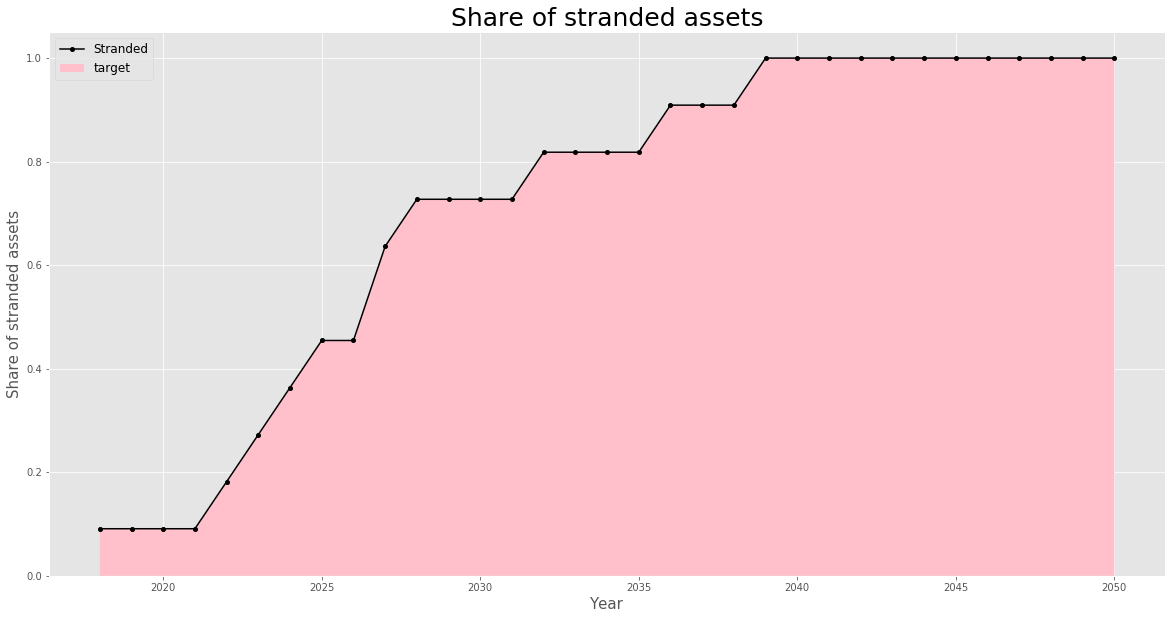

In [24]:
share_of_stranded_assets('Number of buildings', 1.5)

# GRAPH 2 #

In [25]:
AGQ_sum = pd.DataFrame(columns = years, index=['AGQ'])
for i in range(total_port_num):
    for year in years:
        AGQ_sum.iloc[0][year] = AGQ[year].sum()
AMN_sum = pd.DataFrame(columns = years, index=['AMN'])
for i in range(total_port_num):
    for year in years:
        AMN_sum.iloc[0][year] = AMN[year].sum()
AQW_sum = pd.DataFrame(columns = years, index=['AQW'])
for i in range(total_port_num):
    for year in years:
        AQW_sum.iloc[0][year] = AQW[year].sum()

AIB_sum = pd.DataFrame(columns = years, index=['AIB'])
for i in range(total_port_num):
    for year in years:
        AIB_sum.iloc[0][year] = AIB[year].sum()
ANY_sum = pd.DataFrame(columns = years, index=['ANY'])
for i in range(total_port_num):
    for year in years:
        ANY_sum.iloc[0][year] = ANY[year].sum()
ASH_sum = pd.DataFrame(columns = years, index=['ASH'])
for i in range(total_port_num):
    for year in years:
        ASH_sum.iloc[0][year] = ASH[year].sum()
        
AJM_sum = pd.DataFrame(columns = years, index=['AJM'])
for i in range(total_port_num):
    for year in years:
        AJM_sum.iloc[0][year] = AJM[year].sum()
APJ_sum = pd.DataFrame(columns = years, index=['APJ'])
for i in range(total_port_num):
    for year in years:
        APJ_sum.iloc[0][year] = APJ[year].sum()
ATS_sum = pd.DataFrame(columns = years, index=['ATS'])
for i in range(total_port_num):
    for year in years:
        ATS_sum.iloc[0][year] = ATS[year].sum()

In [26]:
def Absolute_stranding_figures(share_base):
#Gross asset valeu='Back-end'!$AGQ$1005:$AHW$1005
#AGQ1005=IF(Portfolio!$H64="Number of buildings",AGQ1003,
#     IF(Portfolio!$H64="Gross floor area",AMN1003/1000,AQW1003/1000000))

#GAV stranded 1.5='Back-end'!$AGQ$1006:$AHW$1006
#AGQ1006=IF(Portfolio!$H64="Number of buildings",AIB1003,
#        IF(Portfolio!$H64="Gross floor area",ANY1003/1000,ASH1003/1000000))

#GAV stranded 2='Back-end'!$AGQ$1007:$AHW$1007
#AGQ1007=Portfolio!$H64="Number of buildings",AJM1003,
#        IF(Portfolio!$H64="Gross floor area",APJ1003/1000,ATS1003/1000000))

    if share_base == 'Number of buildings':
        target = AGQ_sum.iloc[0,:]  
    elif share_base == 'Gross floor area' and target_temp == 1.5:
        target = AMN_sum.iloc[0,:]  
    else:
        target = AQW_sum.iloc[0,:]

    if share_base == 'Number of buildings':
        target1 = AIB_sum.iloc[0,:]  
    elif share_base == 'Gross floor area' and target_temp == 1.5:
        target1 = ANY_sum.iloc[0,:]/1000 
    else:
        target1 = ASH_sum.iloc[0,:]/1000000
        
    if share_base == 'Number of buildings':
        target2 = AJM_sum.iloc[0,:]  
    elif share_base == 'Gross floor area' and target_temp == 1.5:
        target2 = APJ_sum.iloc[0,:]/1000
    else:
        target2 = ATS_sum.iloc[0,:]/1000000  
    plt.figure(figsize = (20,10))
    plt.plot(target.to_list(), 'k', label = 'Gross asset value')
    plt.plot(target1.to_list(), 'blue', label = 'GAV of stranded assets 1.5°C-target')
    plt.plot(target2.to_list(), 'orange', label = 'GAV of stranded assets 2°C-target')
    plt.legend(fontsize = 12)

    #set title and axis labels
    plt.title(f'Share of stranded assets', fontsize = 25)
    plt.xlabel('Year', fontsize = 15)
    plt.ylabel('Share of stranded assets', fontsize = 15)
    plt.show()

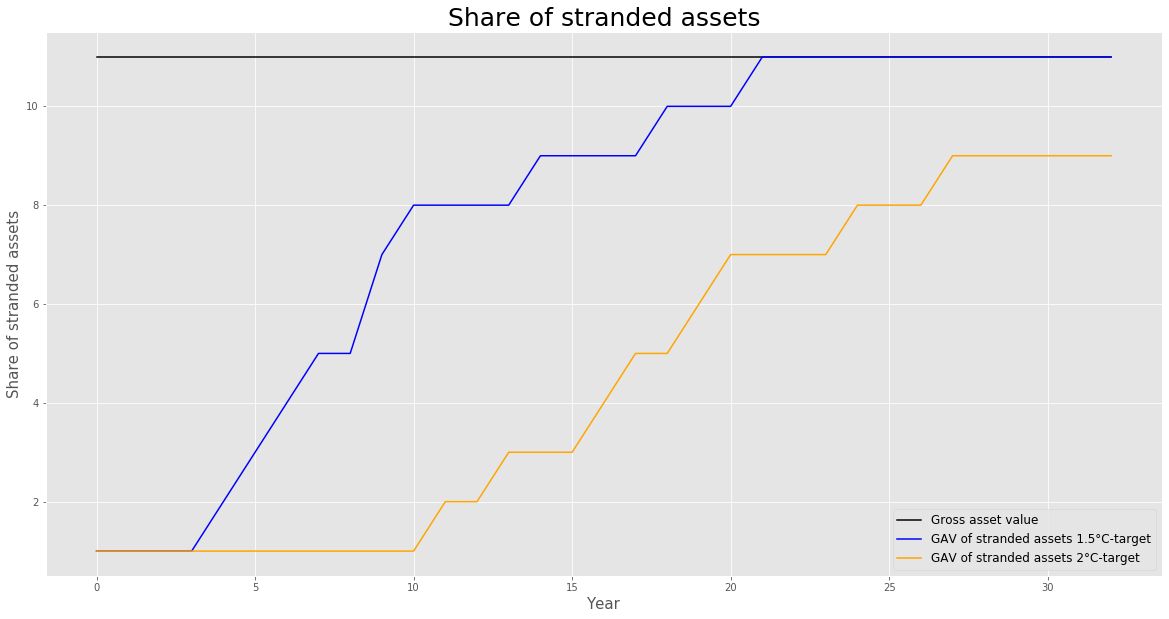

In [27]:
Absolute_stranding_figures('Number of buildings')

# GRAPH 3 #

In [28]:
#x='Back-end'!$AVF$3:$AVF$1002
#y='Back-end'!$AVD$3:$AVD$1002
#size='Back-end'!$AVE$3:$AVE$1002

#AVF=IF(OR(AKX3=0,$BPQ3=0),0,IF(Portfolio!N$21="1.5°C",
#   IF(ISNUMBER(AVB3),'Back-end'!AVB3,0),IF(ISNUMBER(AVC3),'Back-end'!AVC3,0)))

#AVD=IF(OR(AKX3=0,$BPQ3=0),"",IF(AVF3=0,0,
#    IF(ISNUMBER('Back-end'!AQS3),
#    IF('Back-end'!AQS3=0,0.1,'Back-end'!AQS3/1000000),"")))

#AVE=IF(OR(AKX3=0,$BPQ3=0),"",
#    IF(ISNUMBER('Back-end'!AS3),'Back-end'!AS3,0))

In [29]:
#AVB=IF(AND(AKX3=1,ISNUMBER(VW3)),VW3,"")
#VW=IF($BPQ3=0,"",IF(SUM(NK3:OR3)=0,"1.5°C-ready",INDEX(QH$1:RN$1,MATCH(1,QH3:RN3,0))))

#QH=IF($BPQ3=0,"",IF(MATCH(1,$NL3:$OR3,0)=D$1-1,1,0))
QH = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        if NL.iloc[i].to_list().index(1) == year-2018:
            QH.iloc[i][year] = 1
        else:
            QH.iloc[i][year] = 0

#NL_sum = pd.DataFrame(columns = ['sum'], index=list(range(total_asset_num)))
#for i in range(total_asset_num):
#    for year in years:
#        NL_sum.iloc[i][0] = NL[i].sum(axis=1)
VW = pd.DataFrame(columns = ['Year'], index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        if NL.sum(axis=1).to_frame().iloc[i][0] == 0:
            VW.iloc[i][0] = "1.5°C-ready"
        else:
            VW.iloc[i][0] = NL.iloc[i].to_list().index(1)+2018

AVB = pd.DataFrame(columns = ['Str.year.1.5'], index=list(range(total_port_num)))
for i in range(total_port_num):
        if type(VW.iloc[i][0]) == int:
            AVB.iloc[i][0] = VW.iloc[i][0]
        else:
            AVB.iloc[i][0] = '0'

In [30]:
#WA=IF($BPQ3=0,"",IF(SUM(OV3:QC3)=0,"2°C-ready",INDEX(RS$1:SY$1,MATCH(1,RS3:SY3,0))))
WA = pd.DataFrame(columns = ['Year'], index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        if OW.sum(axis=1).to_frame().iloc[i][0] == 0:
            WA.iloc[i][0] = "2°C-ready"
        else:
            WA.iloc[i][0] = OW.iloc[i].to_list().index(1)+2018
AVC = pd.DataFrame(columns = ['Str.year.2'], index=list(range(total_port_num)))
for i in range(total_port_num):
        if type(WA.iloc[i][0]) == int:
            AVC.iloc[i][0] = WA.iloc[i][0]
        else:
            AVC.iloc[i][0] = '0'

In [31]:
#AVF=IF(OR(AKX3=0,$BPQ3=0),0,IF(Portfolio!N$21="1.5°C",
#   IF(ISNUMBER(AVB3),'Back-end'!AVB3,0),IF(ISNUMBER(AVC3),'Back-end'!AVC3,0)))
AVF_1 = pd.DataFrame(columns = ['Year (X-Axis)'], index=list(range(total_port_num)))
for i in range(total_port_num):
    if type(AVB.iloc[i][0]) == int:
        AVF_1.iloc[i][0] = AVB.iloc[i][0]
    else:
        AVF_1.iloc[i][0]= 0
AVF_2 = pd.DataFrame(columns = ['Year (X-Axis)'], index=list(range(total_port_num)))
for i in range(total_port_num):
    if type(AVB.iloc[i][0]) == int:
        AVF_2.iloc[i][0] = AVC.iloc[i][0]
    else:
        AVF_2.iloc[i][0] = 0

In [32]:
#AVD=IF(OR(AKX3=0,$BPQ3=0),"",IF(AVF3=0,0,
#    IF(ISNUMBER('Back-end'!AQS3),
#    IF('Back-end'!AQS3=0,0.1,'Back-end'!AQS3/1000000),"")))
AVD_1 = pd.DataFrame(columns = ['Y-Axis'], index=list(range(total_port_num)))
for i in range(total_port_num):
    if AVF_1.iloc[i][0] == 0:
        AVD_1.iloc[i][0] = 0
    elif input_G.iloc[i][0] == 0:
        AVD_1.iloc[i][0] = 0.1
    elif input_G.iloc[i][0] != 0:
        AVD_1.iloc[i][0] = input_G.iloc[i][0]/1000000
    else:
        AVD_1.iloc[i][0] = 0

AVD_2 = pd.DataFrame(columns = ['Y-Axis'], index=list(range(total_port_num)))
for i in range(total_port_num):
    if AVF_2.iloc[i][0] == '0':
        AVD_2.iloc[i][0] = 0
    elif input_G.iloc[i][0] == 0:
        AVD_2.iloc[i][0] = 0.1
    elif input_G.iloc[i][0] != 0:
        AVD_2.iloc[i][0] = input_G.iloc[i][0]/1000000
    else:
        AVD_2.iloc[i][0] = 0

In [33]:
#AVE=IF(OR(AKX3=0,$BPQ3=0),"",
#    IF(ISNUMBER('Back-end'!AS3),'Back-end'!AS3,0))
AVE = pd.DataFrame(columns = ['Size'], index=list(range(total_port_num)))
for i in range(total_port_num):
    AVE.iloc[i][0] = AS.iloc[i][0]

<class 'method'>


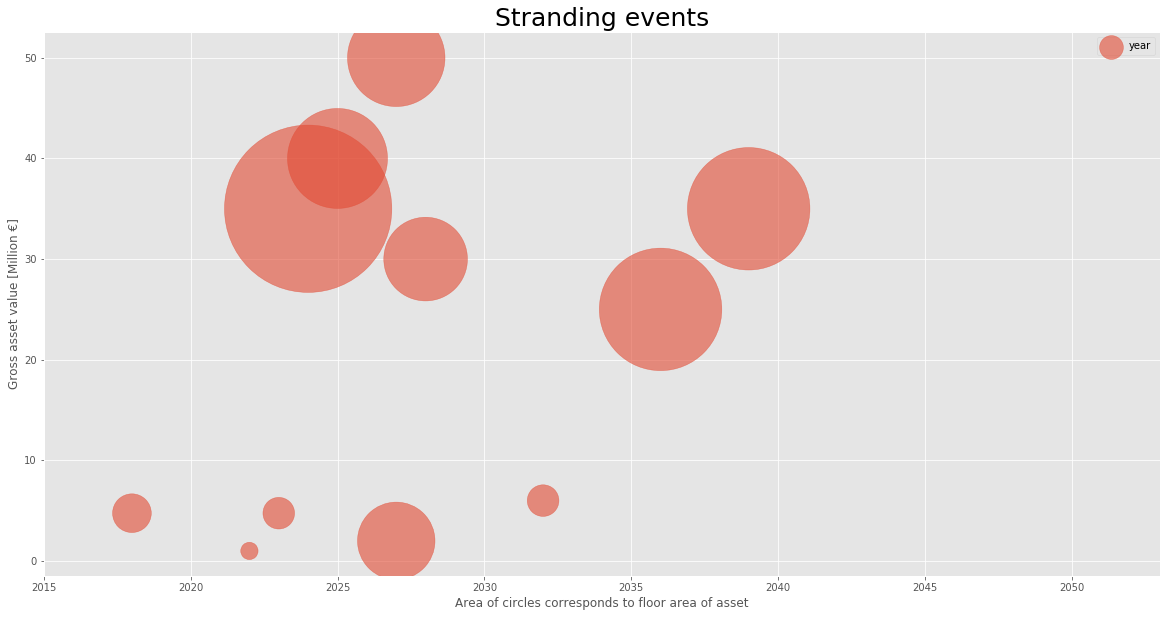

In [34]:
print(type(AVD_1.iloc[:,0].to_list))

x = AVF_1.iloc[:,0] 
y = AVD_1.iloc[:,0] 
z = (AVE.iloc[:, 0]).to_list()

plt.figure(figsize = (20,10))
plt.xlim(2015, 2053)
plt.scatter(x, y, z, alpha=0.6, label = 'year') 
plt.legend(scatterpoints=1, markerscale=0.2)
plt.title('Stranding events', fontsize = 25)
plt.xlabel('Area of circles corresponds to floor area of asset')
plt.ylabel('Gross asset value [Million €]')
plt.show()

In [35]:
def stranding_events(target_temp):
    if target_temp == 1.5:
        x = AVF_1.iloc[:,0] 
        y = AVD_1.iloc[:,0]  
        z = (AVE.iloc[:, 0]).to_list()  

    if target_temp == 2:
        x = AVF_2.iloc[:,0]
        y = AVD_2.iloc[:,0] 
        z = (AVE.iloc[:, 0]).to_list()
    plt.figure(figsize = (20,10))
    plt.xlim(2015, 2053)
    plt.scatter(x, y, z, alpha=0.6, label = 'Stranding events') 
    plt.legend(scatterpoints=1, markerscale=0.2)
    plt.title('Stranding events', fontsize = 25)
    plt.xlabel('Area of circles corresponds to floor area of asset')
    plt.ylabel('Gross asset value [Million €]')
    plt.show()

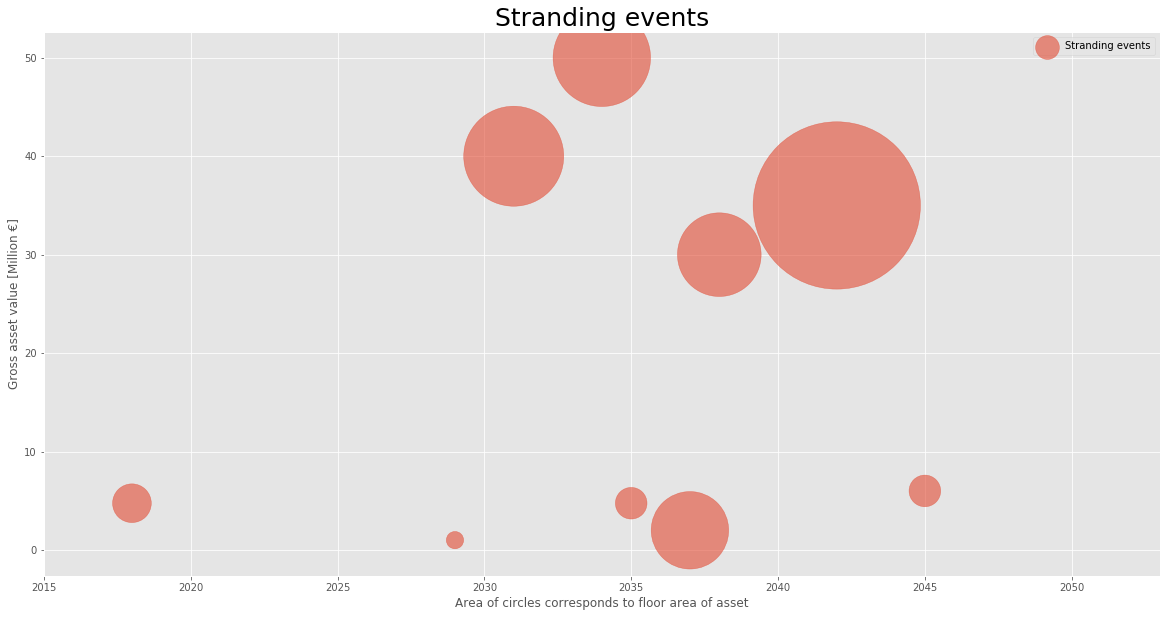

In [36]:
stranding_events(2)

# Graph 4 #

In [37]:
#AFF1004
#=(AFF1003*1000)/SUM(IF(ISNUMBER(AMN3:AMN1002),AMN3:AMN1002*$DGZ3:$DGZ1002))

#AFF1003
#=SUM(AFF3:AFF1002)/1000

#AFF3
#=IF($BPQ3=0,"",IF(COUNTIF(Portfolio!$X$13:$Y$1011,$WI3)=1,
#               IF(AND(COUNTIF($WK$3:$WK$1002,$WI3)=1,VLOOKUP($WI3,Portfolio!$X$13:$Y$1011,2,FALSE)="Yes"),
#               INDEX(KP$3:KP$1003,$WI3),""),""))
KP_drop = KP.drop(KP.index[-1])
AFF = pd.DataFrame(columns = years, index=list(range(total_port_num)))
for i in range(total_port_num):
    for year in years:
        if port_D.iloc[i][0] == 'Yes':
            AFF.iloc[i][year] = KP_drop.iloc[i][year]
        else:
            AFF.iloc[i][year] = 0
#AFF1003=SUM(AFF3:AFF1002)/1000
AFF_sum = pd.DataFrame(columns = years, index=['AFF'])
for year in years:
    AFF_sum.iloc[0][year] = AFF[year].sum()/1000  

#DGZ=IF(AKV3=FALSE,0,IF(AND(AKV3=TRUE,INDEX(Portfolio!Y$13:Y$1012,'Back-end'!AKW3)="Yes"),1,0))
DGZ = pd.DataFrame(columns = ['ID.incl'], index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        if AKV.iloc[i][0] == 'FALSE':
            DGZ.iloc[i][0] = 0
        elif  AKV.iloc[i][0] == 'TRUE' and port_D.iloc[i][0] == 'Yes':
            DGZ.iloc[i][0] = 1
        else:
            DGZ.iloc[i][0] = 0
            
#AMO=IF(ISNUMBER(AGQ3),$AS3*AGQ3,"")
AMO = pd.DataFrame(columns = years, index=list(range(total_port_num)))
for i in range(total_port_num):
    for year in years:
        AMO.iloc[i][year] = (AS.iloc[i][0]*AGQ.iloc[i][year])
#AFF1004=(AFG1003*1000)/SUM(IF(ISNUMBER($AKX3:$AKX1002*AMO3:AMO1002),$AKX3:$AKX1002*AMO3:AMO1002*$DGZ3:$DGZ1002))
for_AFF1004 = pd.DataFrame(columns = years, index=list(range(total_port_num)))
for i in range(total_port_num):
    for year in years:
        for_AFF1004.iloc[i][year] = (AKX.iloc[i][0])*AMO.iloc[i][year]*DGZ.iloc[i][0]

AFF1004 = pd.DataFrame(columns = years, index=['AFF'])
for i in range(total_port_num):
    for year in years:
        AFF1004.iloc[0][year] = (AGQ[year].sum()*1000)/(for_AFF1004[year].sum())

In [38]:
#ACJ1004

#ACJ3
#=IF($BPQ3=0,"",IF(COUNTIF(Portfolio!$X$13:$Y$1011,$WI3)=1,
#               IF(AND(COUNTIF($WK$3:$WK$1002,$WI3)=1,VLOOKUP($WI3,Portfolio!$X$13:$Y$1011,2,FALSE)="Yes"),
#               INDEX(KP$3:KP$1003,$WI3),""),""))
#=IF(AND(ISNUMBER($WK3),Portfolio!$Y13="Yes"),INDEX(ZN$3:ZN$1003,$WK3),"")

ZN = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        ZN.iloc[i,year-2018] = (FP.iloc[i][year]*AS.iloc[i])[0]
ZN_drop = ZN.drop(ZN.index[-1])
ACJ = pd.DataFrame(columns = years, index=list(range(total_port_num)))
for i in range(total_port_num):
    for year in years:
        if port_D.iloc[i][0] == 'Yes':
            ACJ.iloc[i][year] = ZN_drop.iloc[i][year]
        else:
            ACJ.iloc[i][year] = 0
#ACJ1003
#=SUM(ACJ3:ACJ1002)/1000
ACJ_sum = pd.DataFrame(columns = years, index=['ACJ'])
for year in years:
    ACJ_sum.iloc[0][year] = ACJ[year].sum()/1000  
#WM=IF(ISNUMBER(WK3),WL3*INDEX($AKX$3:$AKX$252,WK3),"")
#WL=IF(ISNUMBER(WK3),INDEX(AS$3:AS$1002,WK3),"")
WL = pd.DataFrame(columns = ['FA.compl'], index=list(range(total_port_num)))
for i in range(total_port_num):
    WL.iloc[i][0] = AS.iloc[i][0]
WM = pd.DataFrame(columns = ['Included for portfolio intensity'], index=list(range(total_port_num)))
for i in range(total_port_num):
    WM.iloc[i][0] = WL.iloc[i][0]*AKX.iloc[i][0]

#AFF1004=ACJ1003*1000/SUM(IF(ISNUMBER($WM3:$WM1002*$DGZ3:$DGZ1002),$WM3:$WM1002*$DGZ3:$DGZ1002))
for_ACJ1004 = pd.DataFrame(columns = years, index=list(range(total_port_num)))
for i in range(total_port_num):
    for year in years:
        for_ACJ1004.iloc[i][year] = (WM.iloc[i][0])*DGZ.iloc[i][0]

ACJ1004 = pd.DataFrame(columns = years, index=['ACJ'])
for i in range(total_port_num):
    for year in years:
        ACJ1004.iloc[0][year] = (ACJ_sum.iloc[0][year]*1000)/(for_ACJ1004[year].sum())

In [39]:
#ADU
#ADU3
#=IF(AND(ISNUMBER($WK3),Portfolio!$Y13="Yes"),INDEX(AAY$3:AAY$1003,$WK3),"")
AAY = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        AAY.iloc[i,year-2018] = (HA.iloc[i][year]*AS.iloc[i])[0]
AAY_drop = AAY.drop(AAY.index[-1])
ADU = pd.DataFrame(columns = years, index=list(range(total_port_num)))
for i in range(total_port_num):
    for year in years:
        if port_D.iloc[i][0] == 'Yes':
            ADU.iloc[i][year] = AAY_drop.iloc[i][year]
        else:
            ADU.iloc[i][year] = 0
#ADU1003=SUM(ADU3:ADU1002)/1000
ADU_sum = pd.DataFrame(columns = years, index=['ADU'])
for year in years:
    ADU_sum.iloc[0][year] = ADU[year].sum()/1000  
#WM=IF(ISNUMBER(WK3),WL3*INDEX($AKX$3:$AKX$252,WK3),"")
#WL=IF(ISNUMBER(WK3),INDEX(AS$3:AS$1002,WK3),"")
WL = pd.DataFrame(columns = ['FA.compl'], index=list(range(total_port_num)))
for i in range(total_port_num):
    WL.iloc[i][0] = AS.iloc[i][0]
WM = pd.DataFrame(columns = ['Included for portfolio intensity'], index=list(range(total_port_num)))
for i in range(total_port_num):
    WM.iloc[i][0] = WL.iloc[i][0]*AKX.iloc[i][0]

#ADU1004=ADU1003*1000/SUM(IF(ISNUMBER($WM3:$WM1002*$DGZ3:$DGZ1002),$WM3:$WM1002*$DGZ3:$DGZ1002))
ADU1004 = pd.DataFrame(columns = years, index=['ADU'])
for i in range(total_port_num):
    for year in years:
        ADU1004.iloc[0][year] = (ADU_sum.iloc[0][year]*1000)/(for_ACJ1004[year].sum())

In [40]:
#data for CSP

#BEF: net electricity
BEF = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        BEF.iloc[i,year-2018] = (CZZ_DBF.iloc[i][year] - input_BL.iloc[i]*AWX.iloc[i])[0]
#BFO:net fuel
BFO = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        BFO.iloc[i,year-2018] = ((1+(BMG_BMJ.loc[AR.iloc[i]][3][0])*(BI_CO.iloc[i][year]*AWZ.iloc[i]-1))*
                                 (input_AI.iloc[i]*AWR.iloc[i]+input_AL.iloc[i]*AWS.iloc[i]+(input_BB.iloc[i]+
                                    input_AX.iloc[i])*AWV.iloc[i]*BI_CO.iloc[i][year]))[0]
#BGX: net DH&C
BGX = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        if input_AO.iloc[i][0] == 0:
            BGX.iloc[i,year-2018] = 0
            if input_AS.iloc[i][0] != 0:
                BGX.iloc[i,year-2018] = (input_AS.iloc[i]*CT_DZ.iloc[i][year]*AWU.iloc[i]*AXA.iloc[i])[0]
        else:
            BGX.iloc[i,year-2018] = (input_AO.iloc[i]*BI_CO.iloc[i][year]*AWT.iloc[i]*AWZ.iloc[i])[0]
            if input_AS.iloc[i][0] != 0:
                BGX.iloc[i,year-2018] = (BGX.iloc[i,year-2018] + input_AS.iloc[i]*CT_DZ.iloc[i][year]*AWU.iloc[i]*AXA.iloc[i])[0]
#BIG: net energy consumption
BIG = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        BIG.iloc[i,year-2018] = (BEF.iloc[i][year]+BFO.iloc[i][year]+BGX.iloc[i][year]-input_BQ.iloc[i]*AWX.iloc[i])[0]
#CSK data center or not
#=IF(OR(Input!Q13="Data centers",Input!Q13="Mixed Use"),1,IF(AND(Input!Q13="Mixed Use",Input!Z13>0),1,0))
CSK = pd.DataFrame(columns = ['CSK'], index=list(range(total_asset_num)))
for i in range(total_asset_num):
    if input_Q.iloc[i][0] == 'Data Centers':
        CSK.iloc[i,0] = 1
    elif input_Q.iloc[i][0] == 'Mixed Use' and input_Z.iloc[i][0] > 0:
        CSK.iloc[i,0] = 1
    else:
        CSK.iloc[i,0] = 0
rf = list(range(0,501))
BWK3 = AB3
BWK4 = AB4
#BWI: Property Type Factor
BWI = pd.DataFrame(columns = ['BWI'], index=list(range(total_asset_num)))

for i in range(total_asset_num):
    if input_Q.iloc[i][0] != 'Mixed Use':
        BWI.iloc[i,0] = X2.loc[C1.loc[input_Q.iloc[i]][1][0]][1]
    else:
        BWI.iloc[i,0] = (input_R.iloc[i]*X2[1][i] + input_S.iloc[i]*X2[1][i+1] + input_T.iloc[i]*X2[1][i+2] + input_U.iloc[i]*X2[1][i+3] + input_V.iloc[i]*X2[1][i+4] + input_W.iloc[i]*X2[1][i+5] + input_X.iloc[i]*X2[1][i+6] + input_Y.iloc[i]*X2[1][i+7])[0]
        
BWM = pd.DataFrame(columns = rf, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for j in rf: 
        if CSK.iloc[i][0] == 1:
            BWM.iloc[i,j] = 0
        else: 
            if input_BT.iloc[i][0] == 0:
                BWM.iloc[i,j] = 0
            else:
                if BIG.iloc[i][input_BS.iloc[i][0]]/AS.iloc[i][0] < j:
                    BWM.iloc[i,j] = 0
                else:
                    if input_BT.iloc[i][0] > AS.iloc[i][0]*BWK3/BWK4*BWI.iloc[i][0]*(AF2.loc[AR.iloc[i]].iloc[0][1])*(math.exp(BWK4*BIG.iloc[i][input_BS.iloc[i][0]]/AS.iloc[i])-math.exp(BWK4*j))*(1-(Z4*(1-j/BIG.iloc[i][input_BS.iloc[i][0]])**2+Z6*(1-j/BIG.iloc[i][input_BS.iloc[i][0]])+Z6))**(input_BS.iloc[i][0]-2015):
                        BWM.iloc[i,j] = 1
                    else:
                        BWM.iloc[i,j] = 2
BWM = BWM.iloc[:, ::-1]        
        
# CPT3: RF1 post
CPT = pd.DataFrame(columns = ['CPT'], index=list(range(total_asset_num)))
for i in range(total_asset_num):
    if input_BT.iloc[i][0] == 0:
        CPT.iloc[i] = 0
    else:
        if input_BU.iloc[i][0] != 0:
            CPT.iloc[i] = BIG.iloc[i][2018]/AS.iloc[i][0]*(1-input_BU.iloc[i][0])
        else:
            if not np.where(BWM.iloc[i] == 2)[0].tolist(): 
                CPT.iloc[i] = 'Net-zero'
            else:
                CPT.iloc[i] = 501 - (np.where(BWM.iloc[i] == 2)[0][0]) - 1   
                        
#CPV: energy RF1
CPV = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        if input_BS.iloc[i][0] == 0 and input_BT.iloc[i][0] == 0:
            CPV.iloc[i,year-2018] = BIG.iloc[i][year]/AS.iloc[i][0]
        else:
            if CSK.iloc[i][0] == 1:
                CPV.iloc[i,year-2018] = 0
            else:
                if input_BS.iloc[i][0] > year:
                    CPV.iloc[i,year-2018] = BIG.iloc[i][year]/AS.iloc[i][0]
                else:
                    if input_BS.iloc[i][0] != year:
                        CPV.iloc[i,year-2018] = BIG.iloc[i][year]/BIG.iloc[i][input_BS.iloc[i][0]]*CPT.iloc[i][0]
                    else: 
                        if CPT.iloc[i][0] == 'Net-zero':
                            CPV.iloc[i,year-2018] = 0
                        else:
                            CPV.iloc[i,year-2018] = CPT.iloc[i][0]  


In [41]:
#CSP
#CSP3=IF($BPQ3=0,"",IF(COUNTIF(Portfolio!$X$13:$Y$1011,$WI3)=1,
#     IF(AND(COUNTIF($WK$3:$WK$1002,$WI3)=1,VLOOKUP($WI3,Portfolio!$X$13:$Y$1011,2,FALSE)="Yes"),
#     CRC3*$AS3-INDEX(KP$3:KP$1003,$WI3),""),""))

#CRC: Carbon RF1
CRC = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        CRC.iloc[i,year-2018] = CPV.iloc[i][year]*KP.iloc[i][year]/BIG.iloc[i][year]
CSP = pd.DataFrame(columns = years, index=list(range(total_port_num)))
for i in range(total_port_num):
    for year in years:
        if port_D.iloc[i][0] == 'Yes':
            CSP.iloc[i][year] = (CRC.iloc[i][year]*AS.iloc[i][0]) - KP.iloc[i][year]
        else:
            CSP.iloc[i][year] = 0
#CSP1003=SUM(CSP3:CSP1002)/1000
CSP_sum = pd.DataFrame(columns = years, index=['CSP'])
for year in years:
    CSP_sum.iloc[0][year] = CSP[year].sum()/1000  

#CSP1004=AFF1003+CSP1003
CSP1004 = pd.DataFrame(columns = years, index=['CSP'])
for year in years:
    CSP1004.iloc[0][year] = AFF_sum.iloc[0][year]+CSP_sum.iloc[0][year]

#CSP1005=CSP1004*1000/SUM(IF(ISNUMBER($AMN3:$AMN1002*$DGZ3:$DGZ1002),$AMN3:$AMN1002*$DGZ3:$DGZ1002))

CSP1005 = pd.DataFrame(columns = years, index=['CSP'])
for i in range(total_port_num):
    for year in years:
        CSP1005.iloc[0][year] = (CSP1004.iloc[0][year]*1000)/(for_AFF1004[year].sum())

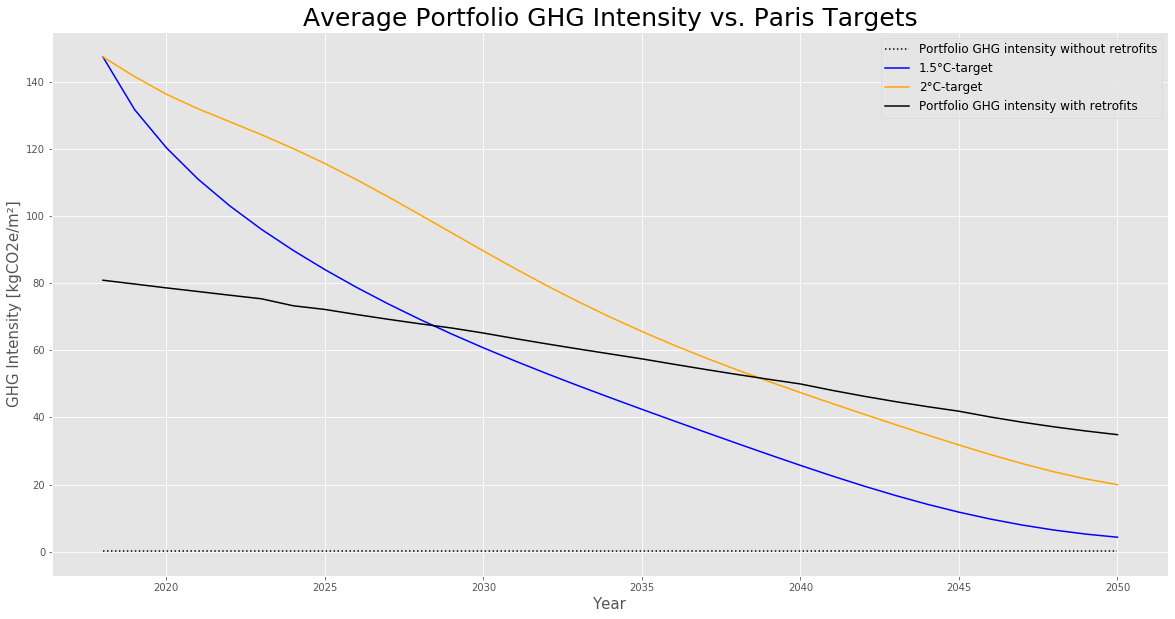

In [42]:
#plotting
plt.figure(figsize = (20,10))
plt.plot(AFF1004.iloc[0,:], 'k', label = 'Portfolio GHG intensity without retrofits', linestyle=':')
plt.plot(ACJ1004.iloc[0,:], 'blue', label = '1.5°C-target')
plt.plot(ADU1004.iloc[0,:], 'orange', label = '2°C-target')
plt.plot(CSP1005.iloc[0,:], 'k', label = 'Portfolio GHG intensity with retrofits')
plt.legend(fontsize = 12)

#set title and axis labels
plt.title(f'Average Portfolio GHG Intensity vs. Paris Targets', fontsize = 25)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('GHG Intensity [kgCO2e/m²]', fontsize = 15)
plt.show()

# Graph 5 #





In [43]:
#E212=SUM(IF(ISNUMBER(BIG3:BIG252*'Back-end'!$DGZ3:$DGZ252),BIG3:BIG252*'Back-end'!$DGZ3:$DGZ252/SUM(AMN3:AMN252)))
for_E212 = pd.DataFrame(columns = years, index=list(range(total_port_num)))
for i in range(total_port_num):
    for year in years:
        for_E212.iloc[i][year] = BIG.iloc[i][year]*DGZ.iloc[i][0]/AMN[year].sum()
E212 = pd.DataFrame(columns = years, index=['E212'])
for i in range(total_port_num):
    for year in years:
        E212.iloc[0][year] = (for_E212[year].sum())

In [44]:
#E213=SUM(IF('Back-end'!$DGZ3:$DGZ252=1,BAB3:BAB252*$AS3:$AS252*'Back-end'!$DGZ3:$DGZ252/SUM(AMN3:AMN252)))

years = list(range(2018,2051))
BAB = pd.DataFrame()
for asset_num in range(1,total_asset_num+1):
    if input_Q.iloc[asset_num-1,:][0] != 'Mixed Use':
        country_code = A1.loc[''.join(map(str, input_M.iloc[asset_num-1,:].tolist())),1]
        property_type_code = C1.loc[''.join(map(str, input_Q.iloc[asset_num-1,:].tolist())),1]
        asset_code = country_code + '_' + property_type_code + '_' + '1.5'
        BAB_new = Target_energy.loc[asset_code]
    else:
        BAB_new = 0
        for i in range(len(C1)-1):
            country_code = A1.loc[''.join(map(str, input_M.iloc[asset_num-1,:].tolist())),1]
            property_type_code = ''.join(map(str, C1.iloc[i]))
            asset_code = country_code + '_' + property_type_code + '_' + '1.5'
            BAB_new = Target_energy.loc[asset_code]*input_R_Z.iloc[asset_num-1][i] + BAB_new
        BAB_new.name = country_code + '_' +  'MIX' + '_' + '2'
    BAB = pd.concat([BAB, pd.DataFrame(BAB_new).T])

for_E213 = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_port_num):
    for year in years:
        for_E213.iloc[i][year] = BAB.iloc[i][year]*AS.iloc[i][0]*DGZ.iloc[i][0]/AMN[year].sum()
E213 = pd.DataFrame(columns = years, index=['E213'])
for i in range(total_port_num):
    for year in years:
        if DGZ.iloc[i][0] == 1:        
            E213.iloc[0][year] = (for_E213[year].sum())

In [45]:
#E214=SUM(IF('Back-end'!$DGZ3:$DGZ252=1,BBK3:BBK252*$AS3:$AS252*'Back-end'!$DGZ3:$DGZ252/SUM(AMN3:AMN252)))

#BKK=IF(Input!$Q13<>"Mixed Use",VLOOKUP(CONCATENATE($AR3,"_",$AM3,"_2"),
#     'Back-end'!$AYQ$272:$AZY$541,'Back-end'!E$1-1,FALSE),
#Input!$R13*VLOOKUP(CONCATENATE($AR3,"_OFF_2"),'Back-end'!$AYQ$272:$AZY$541,'Back-end'!E$1,FALSE)+
#Input!$S13*VLOOKUP(CONCATENATE($AR3,"_RHS_2"),'Back-end'!$AYQ$272:$AZY$541,'Back-end'!E$1,FALSE)+
#Input!$T13*VLOOKUP(CONCATENATE($AR3,"_RSM_2"),'Back-end'!$AYQ$272:$AZY$541,'Back-end'!E$1,FALSE)+
#Input!$U13*VLOOKUP(CONCATENATE($AR3,"_RWB_2"),'Back-end'!$AYQ$272:$AZY$541,'Back-end'!E$1,FALSE)+
#Input!$V13*VLOOKUP(CONCATENATE($AR3,"_DWH_2"),'Back-end'!$AYQ$272:$AZY$541,'Back-end'!E$1,FALSE)+
#Input!$W13*VLOOKUP(CONCATENATE($AR3,"_HOT_2"),'Back-end'!$AYQ$272:$AZY$541,'Back-end'!E$1,FALSE)+
#Input!$X13*VLOOKUP(CONCATENATE($AR3,"_HEC_2"),'Back-end'!$AYQ$272:$AZY$541,'Back-end'!E$1,FALSE)+
#Input!$Y13*VLOOKUP(CONCATENATE($AR3,"_LEI_2"),'Back-end'!$AYQ$272:$AZY$541,'Back-end'!E$1,FALSE)+
#Input!$Z13*VLOOKUP(CONCATENATE($AR3,"_DAT_2"),'Back-end'!$AYQ$272:$AZY$541,'Back-end'!E$1,FALSE)))

BBL = pd.DataFrame()
for asset_num in range(1,total_asset_num+1):
    if input_Q.iloc[asset_num-1,:][0] != 'Mixed Use':
        country_code = A1.loc[''.join(map(str, input_M.iloc[asset_num-1,:].tolist())),1]
        property_type_code = C1.loc[''.join(map(str, input_Q.iloc[asset_num-1,:].tolist())),1]
        asset_code = country_code + '_' + property_type_code + '_' + '2'
        BBL_new = Target_energy.loc[asset_code]
    else:
        BBL_new = 0
        for i in range(len(C1)-1):
            country_code = A1.loc[''.join(map(str, input_M.iloc[asset_num-1,:].tolist())),1]
            property_type_code = ''.join(map(str, C1.iloc[i]))
            asset_code = country_code + '_' +  property_type_code + '_' + '2'
            BBL_new = Target_energy.loc[asset_code]*input_R_Z.iloc[asset_num-1][i] + BBL_new
        BBL_new.name = country_code + '_' +  'MIX' + '_' + '2'
    BBL = pd.concat([BBL, pd.DataFrame(BBL_new).T])

for_E214 = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_port_num):
    for year in years:
        for_E214.iloc[i][year] = BBL.iloc[i][year]*AS.iloc[i][0]*DGZ.iloc[i][0]/AMN[year].sum()
E214 = pd.DataFrame(columns = years, index=['E214'])
for i in range(total_port_num):
    for year in years:
        if DGZ.iloc[i][0] == 1:        
            E214.iloc[0][year] = (for_E214[year].sum())

In [46]:
#E211=SUM(IF(ISNUMBER(CPV3:CPV252*'Back-end'!$DGZ3:$DGZ252),
#     $AS3:$AS252*CPV3:CPV252*'Back-end'!$DGZ3:$DGZ252/SUM(AMN3:AMN252)))

for_E211 = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_port_num):
    for year in years:
        for_E211.iloc[i][year] = CPV.iloc[i][year]*AS.iloc[i][0]*DGZ.iloc[i][0]/AMN[year].sum()
E211 = pd.DataFrame(columns = years, index=['E211'])
for i in range(total_port_num):
    for year in years:
        if DGZ.iloc[i][0] == 1:        
            E211.iloc[0][year] = (for_E211[year].sum())

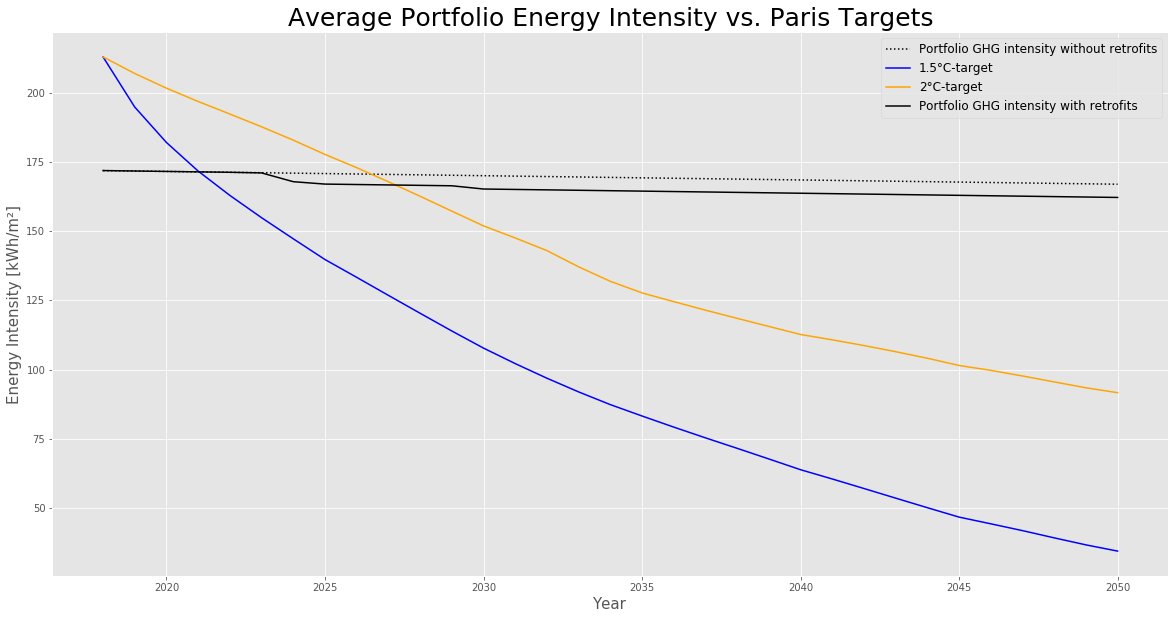

In [47]:
#plotting
plt.figure(figsize = (20,10))
plt.plot(E212.iloc[0,:], 'k', label = 'Portfolio GHG intensity without retrofits', linestyle=':')
plt.plot(E213.iloc[0,:], 'blue', label = '1.5°C-target')
plt.plot(E214.iloc[0,:], 'orange', label = '2°C-target')
plt.plot(E211.iloc[0,:], 'k', label = 'Portfolio GHG intensity with retrofits')
plt.legend(fontsize = 12)

#set title and axis labels
plt.title(f'Average Portfolio Energy Intensity vs. Paris Targets', fontsize = 25)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Energy Intensity [kWh/m²]', fontsize = 15)
plt.show()

# Graph 6 #


In [48]:
#WR1004=SUM(WR3:WR1002)
#WR3=IF($BPQ3=0,"",IF(AND(ISNUMBER($WK3),Portfolio!$AJ16="Yes"),
#   INDEX(CVR$3:CVR$1002,$WK3)*((INDEX(MA$3:MA$1002,$WK3)-INDEX(FP$3:FP$1002,$WK3))*INDEX($AS$3:$AS$1002,$WK3)),""))

CVR = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        if set_AV.iloc[i][0] == 'Default':
            CVR.iloc[i][year] = AVH440.loc[AR.iloc[i]][year][0]
        else:
            if set_AW.iloc[i][0] == 'Set 2018 value and annual rate of change':
                step1 = 1/1000*set_AX.iloc[i][0]*(1+set_AY.iloc[i][0])**i
            else:
                step1 = set_AZ.iloc[i][0]/1000
            CVR.iloc[i][year] = step1*KP.iloc[i][year]
FP = pd.DataFrame()
for asset_num in range(1,total_asset_num+1):
    if input_Q.iloc[asset_num-1,:][0] != 'Mixed Use':
        country_code = A1.loc[''.join(map(str, input_M.iloc[asset_num-1,:].tolist())),1]
        property_type_code = C1.loc[''.join(map(str, input_Q.iloc[asset_num-1,:].tolist())),1]
        asset_code = country_code + '_' + property_type_code + '_' + '1.5'
        FP_new = Target.loc[asset_code]
    else:
        FP_new = 0
        for i in range(len(C1)-1):
            country_code = A1.loc[''.join(map(str, input_M.iloc[asset_num-1,:].tolist())),1]
            property_type_code = ''.join(map(str, C1.iloc[i]))
            asset_code = country_code + '_' + property_type_code + '_' + '1.5'
            FP_new = Target.loc[asset_code]*input_R_Z.iloc[asset_num-1][i] + FP_new
    FP = pd.concat([FP, pd.DataFrame(FP_new).T])
    
WR = pd.DataFrame(columns = years, index=list(range(total_port_num)))
for i in range(total_port_num):
    for year in years:
        if port_E.iloc[i][0] == 'Yes':
            WR.iloc[i][year] = CVR.iloc[i][year]*(MA.iloc[i][year]-FP.iloc[i][year])*AS.iloc[i][0]
        else:
            WR.iloc[i][year]== 0
WR1004 = pd.DataFrame(columns = years, index=['WR'])
for i in range(total_port_num):
    for year in years:
        WR1004.iloc[0][year] = WR[year].sum()
#YC1004=SUM(YC3:YC1002)
#YC=IF($BPQ3=0,"",IF(AND(ISNUMBER($WK3),Portfolio!$AJ16="Yes"),
#INDEX(CVR3:CVR1002,$WK3)*((INDEX(MA$3:MA$1002,$WK3)-INDEX(HA$3:HA$1002,$WK3))*INDEX($AS$3:$AS$1002,$WK3)),""))
YC = pd.DataFrame(columns = years, index=list(range(total_port_num)))
for i in range(total_port_num):
    for year in years:
        if port_E.iloc[i][0] == 'Yes':
            YC.iloc[i][year] = CVR.iloc[i][year]*(MA.iloc[i][year]-HA.iloc[i][year])*AS.iloc[i][0]
        else:
            YC.iloc[i][year]== 0
YC1004 = pd.DataFrame(columns = years, index=['YC'])
for i in range(total_port_num):
    for year in years:
        YC1004.iloc[0][year] = YC[year].sum()

In [49]:
#='Back-end'!$E$187:$AK$187  ##E187=IF(E185>=0,E185,0) #E185=IF(Portfolio!$AJ$10="1.5°C",WR1004,YC1004)
#='Back-end'!$E$186:$AK$186  ##E186=IF(E185<0,E185,0)
E187 = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        if asset_IB.iloc[i][year] >= 0:
            E12_1.iloc[i][year] = asset_IB.iloc[i][year]        
        else:
            E12_1.iloc[i][year] = 0

NameError: name 'asset_IB' is not defined

In [ ]:
#data for plotting
WR_E187 = pd.DataFrame(columns = years, index=['WR_E187'])
for i in range(total_port_num):
    for year in years:
        if WR1004.iloc[0][year] >= 0:
            WR_E187.iloc[0][year] = WR1004.iloc[0][year]
        else:
            WR_E187.iloc[0][year] = 0
YC_E187 = pd.DataFrame(columns = years, index=['YC_E187'])
for i in range(total_port_num):
    for year in years:
        if YC1004.iloc[0][year] >= 0:
            YC_E187.iloc[0][year] = YC1004.iloc[0][year]
        else:
            YC_E187.iloc[0][year] = 0

WR_E186 = pd.DataFrame(columns = years, index=['WR_E186'])
for i in range(total_port_num):
    for year in years:
        if WR1004.iloc[0][year] < 0:
            WR_E186.iloc[0][year] = WR1004.iloc[0][year]
        else:
            WR_E186.iloc[0][year] = 0
YC_E186 = pd.DataFrame(columns = years, index=['YC_E186'])
for i in range(total_port_num):
    for year in years:
        if YC1004.iloc[0][year] < 0:
            YC_E186.iloc[0][year] = YC1004.iloc[0][year]
        else:
            YC_E186.iloc[0][year] = 0

In [ ]:
def Absolute_stranding_figures(target_temp):
#='Back-end'!$E$187:$AK$187  ##E187=IF(E185>=0,E185,0) #E185=IF(Portfolio!$AJ$10="1.5°C",WR1004,YC1004)
#='Back-end'!$E$186:$AK$186  ##E186=IF(E185<0,E185,0)
#='Back-end'!$E$185:$AK$185
#='Back-end'!$E$188:$AK$188
    #cost = E187
    if target_temp == 1.5: 
        costs = WR_E187.iloc[0,:]
    elif target_temp == 2:
        costs = YC_E187.iloc[0,:]
    #value = E186
    if target_temp == 1.5: 
        value = WR_E186.iloc[0,:]
    elif target_temp == 2:
        value = YC_E186.iloc[0,:]
    if target_temp == 1.5: 
        line = WR1004.iloc[0,:]
    elif target_temp == 2:
        line = YC1004.iloc[0,:]
        
    #plot diagram
    plt.figure(figsize = (20,10))
    plt.plot(line, 'k')
    year = [2020,2025,2030,2035,2040,2045,2050]
    line_points = [int(i) for i in line[[2020,2025,2030,2035,2040,2045,2050]]]
    for i, txt in enumerate(line_points):
        plt.annotate(txt, (year[i], line_points[i]), fontsize =12)
    plt.plot(line[[2020,2025,2030,2035,2040,2045,2050]], 'ko', markersize = 5)
#    Baseline = [0]*len(costs)
#    baseline = pd.Series(Baseline, index = costs.index) 
    plt.fill_between(years, value.to_list(), 0, where = (costs == 0), color='green', alpha=0.3, label = 'Value')
    plt.fill_between(years, costs.to_list(), 0, where = (costs > value), color='C0', alpha=0.3, label = 'Costs')
    plt.legend(fontsize = 12)
    plt.ylim(-6000, 25000)

    plt.title('CARBON COSTS OF EXCESS EMISSIONS', fontsize = 25)
    plt.xlabel('Year', fontsize = 15)
    plt.ylabel('Cost [€]', fontsize = 15)
    plt.show()

In [ ]:
Absolute_stranding_figures(1.5)